<a href="https://colab.research.google.com/github/Sujan-Sawant/AdEase-Time-Series/blob/main/Ad_Ease_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

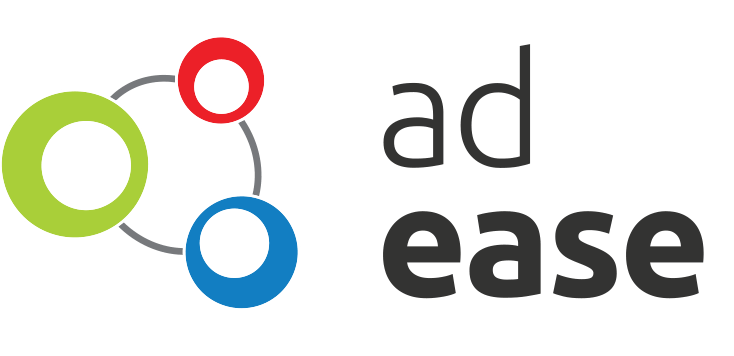

## <font color = "red">**Problem Statement**</p>

-  **Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.**

- **You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.**


## <font color = "green">**Concepts Tested:**
 - **Exploratory data analysis**

 - **Time Series forecasting- ARIMA, SARIMAX, and Prophet.**

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Downloding the data
! gdown 1LRUvJJWgqihzLChFL1mR3tSmTLF3wFi2

Downloading...
From (original): https://drive.google.com/uc?id=1LRUvJJWgqihzLChFL1mR3tSmTLF3wFi2
From (redirected): https://drive.google.com/uc?id=1LRUvJJWgqihzLChFL1mR3tSmTLF3wFi2&confirm=t&uuid=3edcf027-3cf2-4aba-8ec3-3bbe5bb6e5f6
To: /content/ad_ease_train_1.csv
100% 278M/278M [00:02<00:00, 133MB/s]


In [ ]:
pd.reset_option('display.max_columns')


In [ ]:
# Reading or Loading a CSV file into a pandas DataFrame.
df = pd.read_csv("/content/ad_ease_train_1.csv")

In [ ]:
# Viewing the first few rows of a DataFrame.
df.head()

Page  01-07-2015  02-07-2015  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   03-07-2015  04-07-2015  05-07-2015  06-07-2015  07-07-2015  08-07-2015  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   09-07-2015  ...  22-12-2016  23-12-2016  24-12-2016  25-12-2016  \
0        26.0  ...        32.0        63.0        15.0        26.0   
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         NaN  ...        48.0         9.0        25.0        13.0   

   26-12-2016  27-12-2016  28-12-2016  29-12-2016  30-12-2016  31-12-2016  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

In [ ]:
# Viewing the last few rows of a DataFrame.
df.tail()

Page  01-07-2015  \
145058  Underworld_(serie_de_películas)_es.wikipedia.o...         NaN   
145059  Resident_Evil:_Capítulo_Final_es.wikipedia.org...         NaN   
145060  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...         NaN   
145061  Hasta_el_último_hombre_es.wikipedia.org_all-ac...         NaN   
145062  Francisco_el_matemático_(serie_de_televisión_d...         NaN   

        02-07-2015  03-07-2015  04-07-2015  05-07-2015  06-07-2015  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        07-07-2015  08-07-2015  09-07-2015  ...  22-12-2016  23-12-2016  \
145058         NaN         NaN         NaN  ...         NaN         NaN   
145059         NaN         NaN         NaN  ...         NaN         NaN   
145060         NaN         NaN         NaN  ...         NaN         NaN   
145061         NaN         NaN         NaN  ...         NaN         NaN   
145062         NaN         NaN         NaN  ...         NaN         NaN   

        24-12-2016  25-12-2016  26-12-2016  27-12-2016  28-12-2016  \
145058         NaN         NaN        13.0        12.0        13.0   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        29-12-2016  30-12-2016  31-12-2016  
145058         3.0         5.0        10.0  
145059         NaN         NaN         NaN  
145060         NaN         NaN         NaN  
145061         NaN         NaN         NaN  
145062         NaN         NaN         NaN  

[5 rows x 551 columns]

In [ ]:
# Retrieving the dimensions of a DataFrame (Rows, Columns).
df.shape

(145063, 551)

In [ ]:
# Display the number of missing values (NaN) in each column of the DataFrame
df.isnull().sum()

Page              0
01-07-2015    20740
02-07-2015    20816
03-07-2015    20544
04-07-2015    20654
              ...  
27-12-2016     3701
28-12-2016     3822
29-12-2016     3826
30-12-2016     3635
31-12-2016     3465
Length: 551, dtype: int64

In [ ]:
# Retrive the overview of a DataFrame's structure and content.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 31-12-2016
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [ ]:
# Retrieving the column labels (names) of a DataFrame .
df.columns

Index(['Page', '01-07-2015', '02-07-2015', '03-07-2015', '04-07-2015',
       '05-07-2015', '06-07-2015', '07-07-2015', '08-07-2015', '09-07-2015',
       ...
       '22-12-2016', '23-12-2016', '24-12-2016', '25-12-2016', '26-12-2016',
       '27-12-2016', '28-12-2016', '29-12-2016', '30-12-2016', '31-12-2016'],
      dtype='object', length=551)

In [ ]:
# Checking for null values
df.isnull().sum()

Page              0
01-07-2015    20740
02-07-2015    20816
03-07-2015    20544
04-07-2015    20654
              ...  
27-12-2016     3701
28-12-2016     3822
29-12-2016     3826
30-12-2016     3635
31-12-2016     3465
Length: 551, dtype: int64

In [ ]:
df.loc[0:5]

Page  01-07-2015  02-07-2015  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   
5            5566_zh.wikipedia.org_all-access_spider        12.0         7.0   

   03-07-2015  04-07-2015  05-07-2015  06-07-2015  07-07-2015  08-07-2015  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   
5         4.0         5.0        20.0         8.0         5.0        17.0   

   09-07-2015  ...  22-12-2016  23-12-2016  24-12-2016  25-12-2016  \
0        26.0  ...        32.0        63.0        15.0        26.0   
1        10.0  ...        17.0        42.0        28.0        15.0   
2         4.0  ...         3.0         1.0         1.0         7.0   
3        11.0  ...        32.0        10.0        26.0        27.0   
4         NaN  ...        48.0         9.0        25.0        13.0   
5        24.0  ...        16.0        27.0         8.0        17.0   

   26-12-2016  27-12-2016  28-12-2016  29-12-2016  30-12-2016  31-12-2016  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  
5        32.0        19.0        23.0        17.0        17.0        50.0  

[6 rows x 551 columns]

### Prepare data for time series

In [ ]:
df[["Title", "Language"]] = df["Page"].str.extract(r"^(.+?)_([a-z\-]+)\.wikipedia\.org")


df.head()

Page  01-07-2015  02-07-2015  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   03-07-2015  04-07-2015  05-07-2015  06-07-2015  07-07-2015  08-07-2015  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   09-07-2015  ...  24-12-2016  25-12-2016  26-12-2016  27-12-2016  \
0        26.0  ...        15.0        26.0        14.0        20.0   
1        10.0  ...        28.0        15.0         9.0        30.0   
2         4.0  ...         1.0         7.0         4.0         4.0   
3        11.0  ...        26.0        27.0        16.0        11.0   
4         NaN  ...        25.0        13.0         3.0        11.0   

   28-12-2016  29-12-2016  30-12-2016  31-12-2016             Title  Language  
0        22.0        19.0        18.0        20.0              2NE1        zh  
1        52.0        45.0        26.0        20.0               2PM        zh  
2         6.0         3.0         4.0        17.0                3C        zh  
3        17.0        19.0        10.0        11.0           4minute        zh  
4        27.0        13.0        36.0        10.0  52_Hz_I_Love_You        zh  

[5 rows x 553 columns]

In [ ]:
# # reshape from wide to long
df_long = df.melt(id_vars=["Page", "Title", "Language"],
                  var_name="Date", value_name="Views")

# Convert date column
df_long["Date"] = pd.to_datetime(df_long["Date"], format="%d-%m-%Y", errors="coerce")

# Aggregate views by date
df_agg = df_long.groupby("Date")["Views"].sum().reset_index()

# Sort by date (important for time series)
df_agg = df_agg.sort_values("Date")

# Set date as index for ARIMA modeling
df_agg.set_index("Date", inplace=True)

In [ ]:
df_agg.head(15)

Views
Date                   
2015-07-01  148672476.0
2015-07-02  149593840.0
2015-07-03  141164198.0
2015-07-04  145612937.0
2015-07-05  151495372.0
2015-07-06  160742234.0
2015-07-07  154147373.0
2015-07-08  148860911.0
2015-07-09  149532135.0
2015-07-10  148374487.0
2015-07-11  145311879.0
2015-07-12  161476064.0
2015-07-13  162094487.0
2015-07-14  162050605.0
2015-07-15  151989235.0

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Drop any missing values (important for ADF test)
views_series = df_agg["Views"].dropna()

# Run the Augmented Dickey-Fuller test
result = adfuller(views_series)

# Print the results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Number of Lags Used:", result[2])
print("Number of Observations Used:", result[3])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value:.4f}")

# Interpretation
if result[1] <= 0.05:
    print("=> Conclusion: Strong evidence against the null hypothesis (non-stationary); the series is likely **stationary**.")
else:
    print("=> Conclusion: Weak evidence against the null hypothesis; the series is likely **non-stationary**.")


ADF Statistic: -2.4366326949294823
p-value: 0.13166285090995544
Number of Lags Used: 14
Number of Observations Used: 535
Critical Values:
   1%: -3.4426
   5%: -2.8670
   10%: -2.5697
=> Conclusion: Weak evidence against the null hypothesis; the series is likely **non-stationary**.


## To train arima model the series should be stationary,Since my series is non-stationary lets make this stationary by diffrencing it

In [ ]:
# First difference to remove trend
df_agg['Views_diff'] = df_agg['Views'].diff()

# Drop the NaN introduced by differencing
df_agg_diff = df_agg['Views_diff'].dropna()


In [ ]:
df_agg_diff.head()

Date
2015-07-02     921364.0
2015-07-03   -8429642.0
2015-07-04    4448739.0
2015-07-05    5882435.0
2015-07-06    9246862.0
Name: Views_diff, dtype: float64

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller

result_diff = adfuller(df_agg_diff)
print("ADF Statistic (Diff):", result_diff[0])
print("p-value (Diff):", result_diff[1])
print("Number of Lags Used:", result_diff[2])
print("Number of Observations Used:", result_diff[3])
print("Critical Values:")
for key, value in result_diff[4].items():
    print(f"   {key}: {value:.4f}")

if result_diff[1] <= 0.05:
    print("=> Conclusion: The differenced series is stationary.")
else:
    print("=> Conclusion: Still non-stationary. You may need 2nd differencing.")


ADF Statistic (Diff): -7.89370490354023
p-value (Diff): 4.367449082413461e-12
Number of Lags Used: 13
Number of Observations Used: 535
Critical Values:
   1%: -3.4426
   5%: -2.8670
   10%: -2.5697
=> Conclusion: The differenced series is stationary.


## <font color = "red"> Now lets fit the ARIMA Model

ARIMA MAE: 12231111.26
ARIMA RMSE: 15369990.82


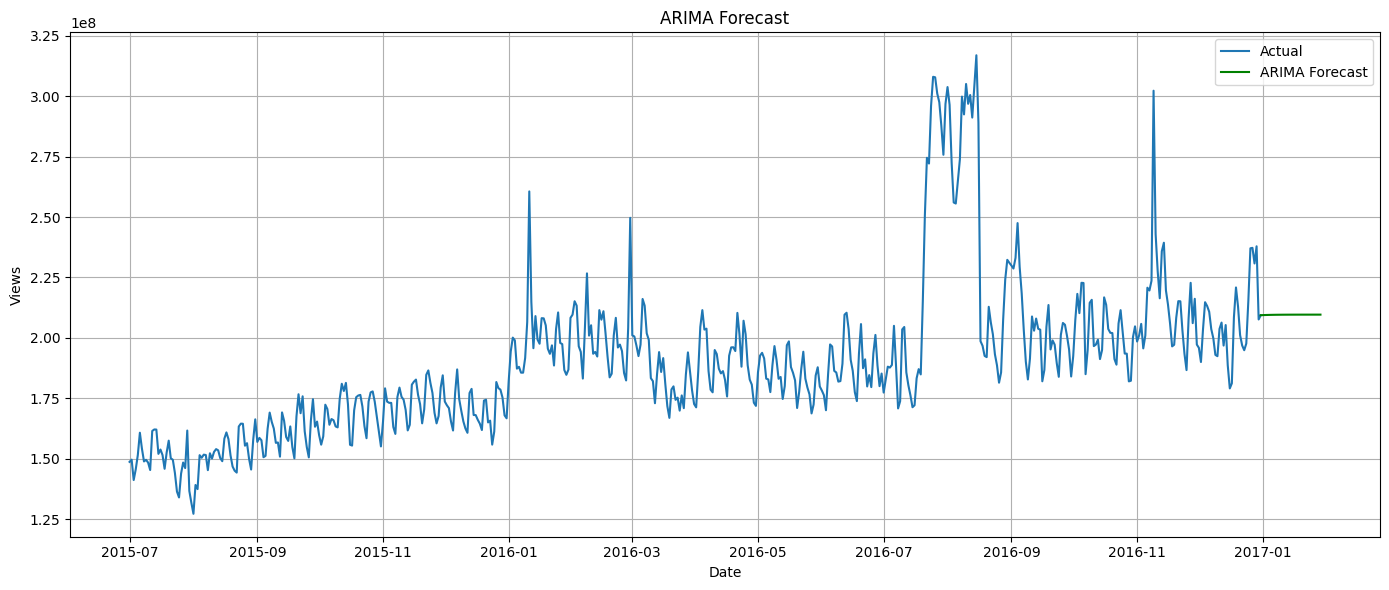

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller

model_arima = ARIMA(df_agg["Views"], order=(1, 1, 1))
model_arima_fit = model_arima.fit()

# Forecasting (next 30 days)
forecast_arima = model_arima_fit.forecast(steps=30)

# Evaluation against the last 30 values (if available)
actual = df_agg["Views"].iloc[-30:]
mae = mean_absolute_error(actual, forecast_arima[:len(actual)])
rmse = np.sqrt(mean_squared_error(actual, forecast_arima[:len(actual)]))
print(f"ARIMA MAE: {mae:.2f}")
print(f"ARIMA RMSE: {rmse:.2f}")

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(df_agg.index, df_agg["Views"], label="Actual")
plt.plot(pd.date_range(df_agg.index[-1], periods=30, freq="D"), forecast_arima, label="ARIMA Forecast", color="green")
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Hyperparameter tunning

Best ARIMA Order: (0, 1, 0)
RMSE: 15333155.78


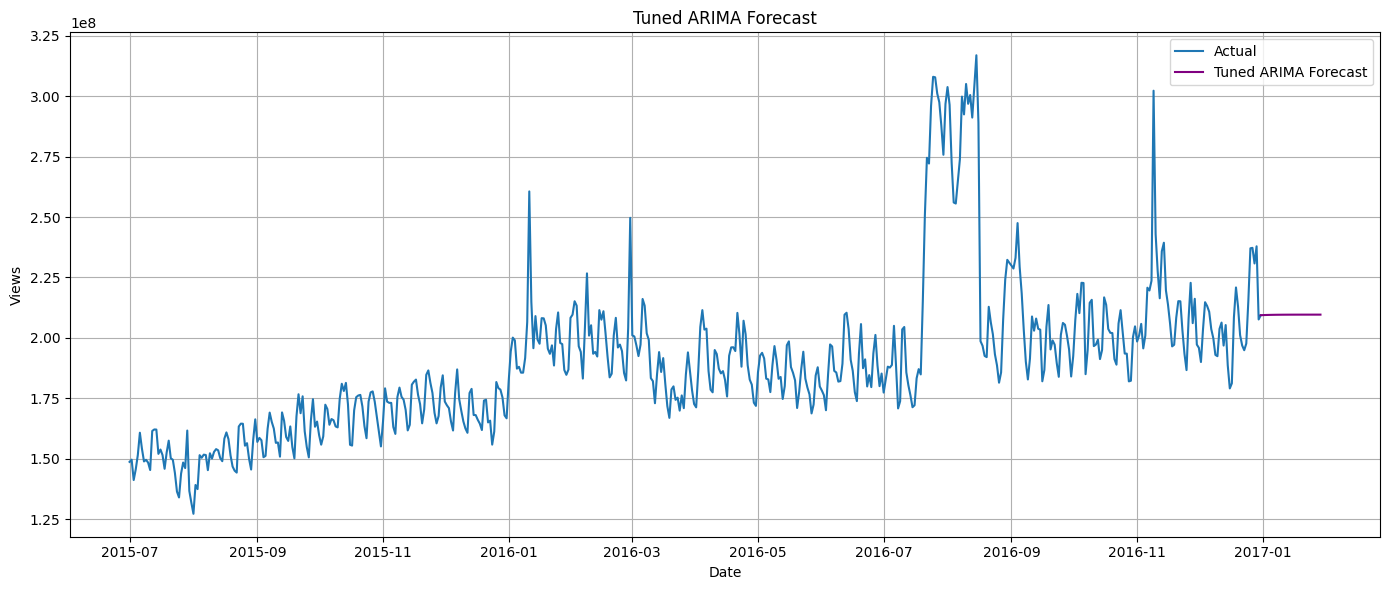

In [ ]:
# STEP 7: Hyperparameter tuning for ARIMA
best_rmse = float("inf")
best_order = None
best_forecast = None
actual = df_agg["Views"].iloc[-30:]

# Try combinations of p, d, q
for p in [0, 1, 2]:
    for d in [0, 1,2]:
        for q in [0, 1, 2]:
            try:
                model = ARIMA(df_agg["Views"], order=(p, d, q))
                model_fit = model.fit()
                forecast = model_fit.forecast(steps=30)

                rmse = np.sqrt(mean_squared_error(actual, forecast))


                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = (p, d, q)
                    best_forecast = forecast
            except:
                continue


rmse = best_rmse


print(f"Best ARIMA Order: {best_order}")
print(f"RMSE: {rmse:.2f}")


# Plotting
plt.figure(figsize=(14, 6))
plt.plot(df_agg.index, df_agg["Views"], label="Actual")
plt.plot(pd.date_range(df_agg.index[-1], periods=30, freq="D"), forecast_arima, label="Tuned ARIMA Forecast", color="purple")
plt.title("Tuned ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## SARIMA

SARIMA MAE: 22753932.63
SARIMA RMSE: 26240733.08


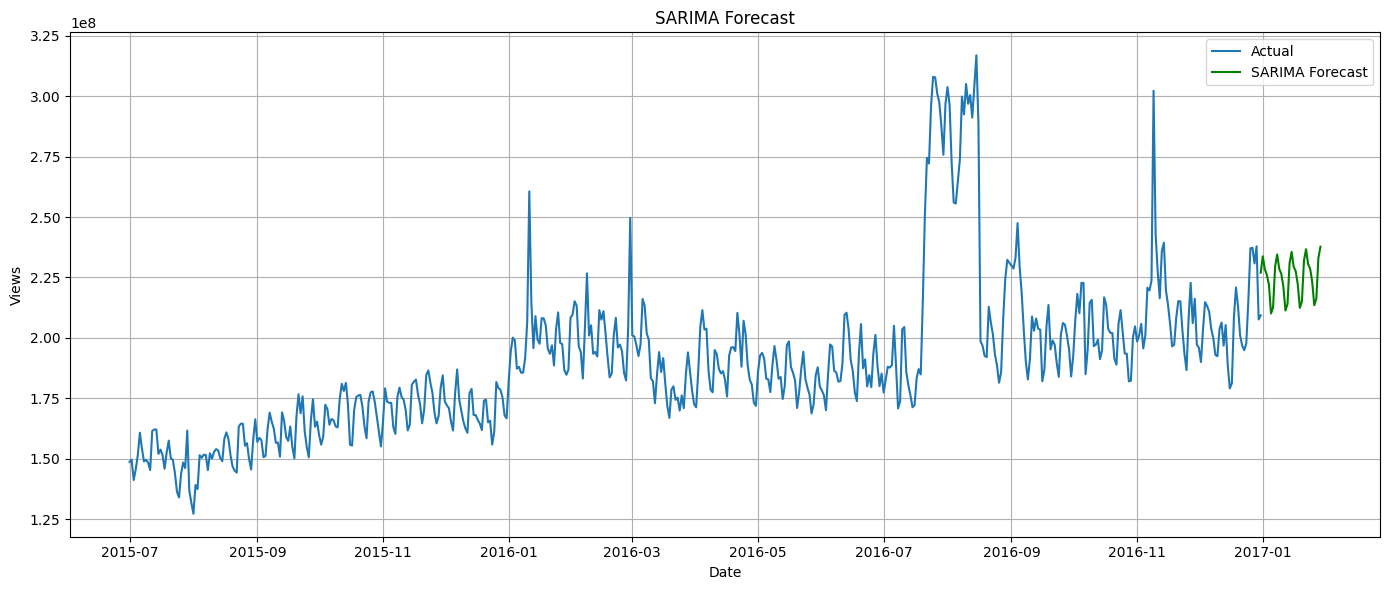

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# --- FIT SARIMA MODEL
sarima_model = SARIMAX(df_agg["Views"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_fit = sarima_model.fit(disp=False)

# Forecasting with SARIMA
forecast_sarima = sarima_fit.forecast(steps=30)

# Evaluation for SARIMA
mae_sarima = mean_absolute_error(actual, forecast_sarima[:len(actual)])
rmse_sarima = np.sqrt(mean_squared_error(actual, forecast_sarima[:len(actual)]))
print(f"SARIMA MAE: {mae_sarima:.2f}")
print(f"SARIMA RMSE: {rmse_sarima:.2f}")

# Plotting SARIMA
plt.figure(figsize=(14, 6))
plt.plot(df_agg.index, df_agg["Views"], label="Actual")
plt.plot(pd.date_range(df_agg.index[-1], periods=30, freq="D"), forecast_sarima, label="SARIMA Forecast", color="green")
plt.title("SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Hyperparameter tunning

Tuning SARIMA parameters...
Best SARIMA Order: (0, 1, 0)
Best Seasonal Order: (0, 0, 0, 7)
SARIMA RMSE: 15333155.78


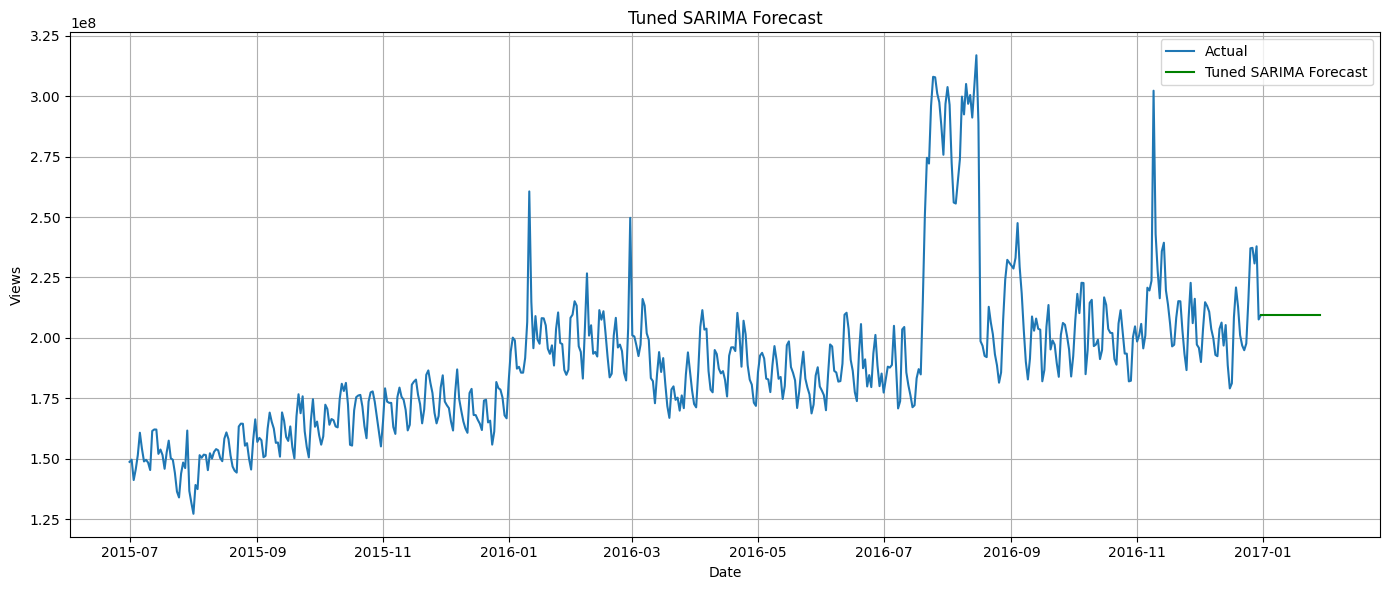

In [ ]:
# --- HYPERPARAMETER TUNING FOR SARIMA ---
best_rmse_sarima = float("inf")
best_sarima_order = None
best_sarima_seasonal = None
best_forecast_sarima = None

print("Tuning SARIMA parameters...")

for p in [0, 1,2]:
    for d in [0, 1,2]:
        for q in [0, 1,2]:
            for P in [0, 1,2]:
                for D in [0, 1,2]:
                    for Q in [0, 1,2]:
                        seasonal_order = (P, D, Q, 7)  # Weekly seasonality
                        try:
                            model = SARIMAX(df_agg["Views"], order=(p, d, q), seasonal_order=seasonal_order,
                                            enforce_stationarity=False, enforce_invertibility=False)
                            model_fit = model.fit(disp=False)
                            forecast = model_fit.forecast(steps=30)
                            rmse = np.sqrt(mean_squared_error(actual, forecast[:len(actual)]))
                            if rmse < best_rmse_sarima:
                                best_rmse_sarima = rmse
                                best_sarima_order = (p, d, q)
                                best_sarima_seasonal = seasonal_order
                                best_forecast_sarima = forecast
                        except:
                            continue

print(f"Best SARIMA Order: {best_sarima_order}")
print(f"Best Seasonal Order: {best_sarima_seasonal}")
print(f"SARIMA RMSE: {best_rmse_sarima:.2f}")

# Plotting SARIMA
plt.figure(figsize=(14, 6))
plt.plot(df_agg.index, df_agg["Views"], label="Actual")
plt.plot(pd.date_range(df_agg.index[-1], periods=30, freq="D"), best_forecast_sarima, label="Tuned SARIMA Forecast", color="green")
plt.title("Tuned SARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model: order=(p,d,q) -> here starting with (1,1,1)
model = ARIMA(df_agg["Views"], order=(1, 1, 1))  # d=1 because we did first differencing
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Views   No. Observations:                  550
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9727.520
Date:                Sun, 20 Apr 2025   AIC                          19461.040
Time:                        09:51:23   BIC                          19473.964
Sample:                    07-01-2015   HQIC                         19466.091
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8343      0.029     28.792      0.000       0.777       0.891
ma.L1         -0.9451      0.018    -52.533      0.000      -0.980      -0.910
sigma2      1.489e+14    3.6e-17   4.14e+30      0.0

## ACF AND PACF Plots

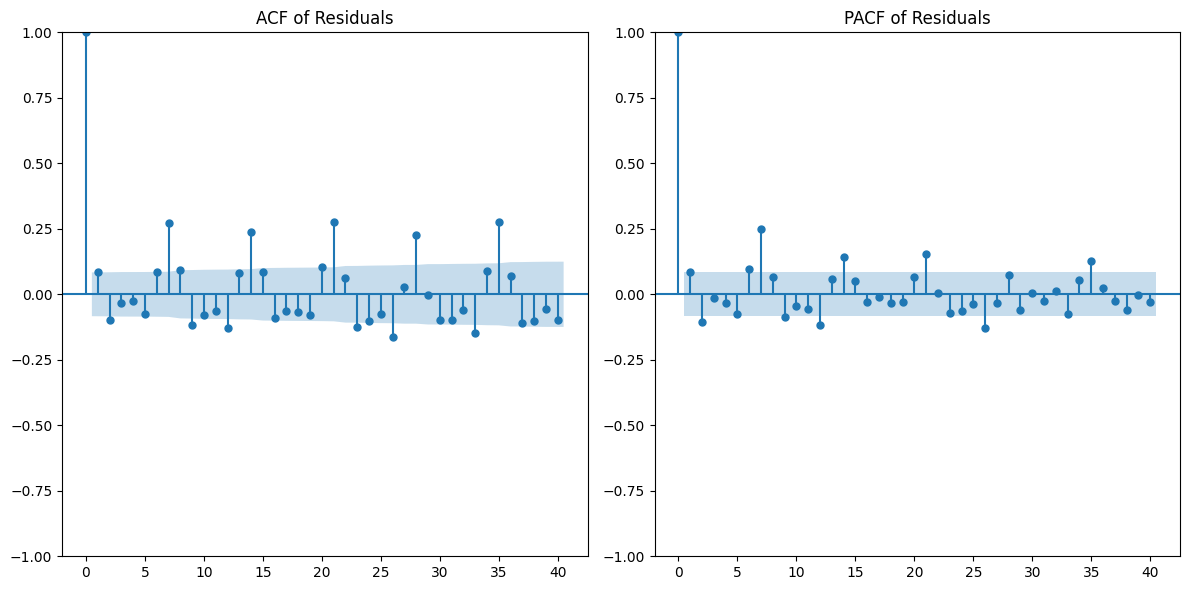

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Extract the residuals from the fitted model
residuals = model_fit.resid

# Create figure and set size for ACF and PACF plots
plt.figure(figsize=(12, 6))

# ACF plot (Autocorrelation of residuals)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plot_acf(residuals, lags=40, ax=plt.gca())  # ACF plot for first 40 lags
plt.title('ACF of Residuals')

# PACF plot (Partial Autocorrelation of residuals)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plot_pacf(residuals, lags=40, ax=plt.gca())  # PACF plot for first 40 lags
plt.title('PACF of Residuals')

# Show the plots
plt.tight_layout()
plt.show()

## Lets plot actual vs predicted

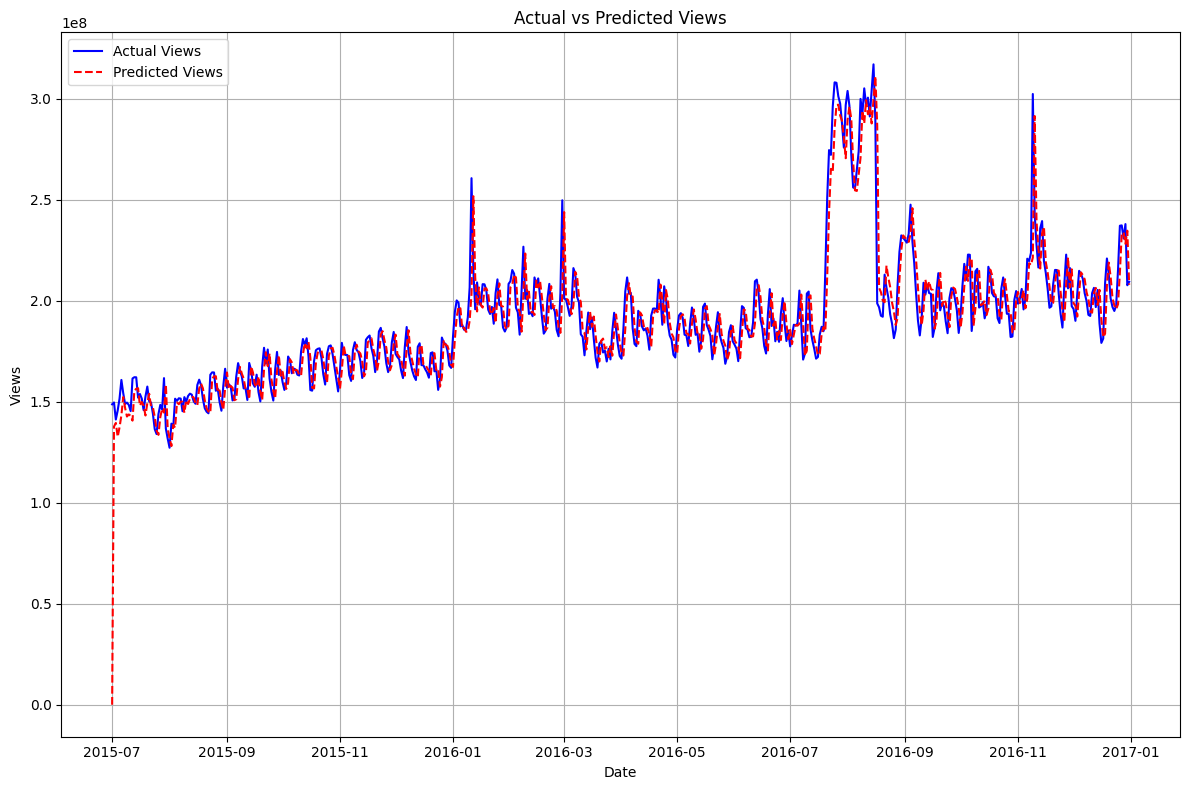

In [ ]:
predictions = model_fit.fittedvalues  # These are the predictions for the training data

# Plot Actual vs Predicted values
plt.figure(figsize=(12, 8))
plt.plot(df_agg.index, df_agg["Views"], label='Actual Views', color='blue')
plt.plot(df_agg.index, predictions, label='Predicted Views', color='red', linestyle='--')
plt.title('Actual vs Predicted Views')
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Download exogerous data

In [ ]:
! gdown 1XaMiP5mRXr3krWVTOvF7BuEfo1YO137m

Downloading...
From: https://drive.google.com/uc?id=1XaMiP5mRXr3krWVTOvF7BuEfo1YO137m
To: /content/exo1.csv
100% 7.71k/7.71k [00:00<00:00, 15.7MB/s]


In [ ]:
exog_variable = pd.read_csv("/content/exo1.csv")

In [ ]:
exog_variable.head()

Date  Exog
0  2015-07-01     0
1  2015-07-02     0
2  2015-07-03     0
3  2015-07-04     0
4  2015-07-05     0

In [ ]:
exog_variable["Date"] = pd.to_datetime(exog_variable["Date"], errors="coerce")


In [ ]:
sarima_df = pd.merge(df_agg, exog_variable, on='Date', how='left')
sarima_df.head()

Date        Views  Views_diff  Exog
0 2015-07-01  148672476.0         NaN     0
1 2015-07-02  149593840.0    921364.0     0
2 2015-07-03  141164198.0  -8429642.0     0
3 2015-07-04  145612937.0   4448739.0     0
4 2015-07-05  151495372.0   5882435.0     0

## SARIMA Model

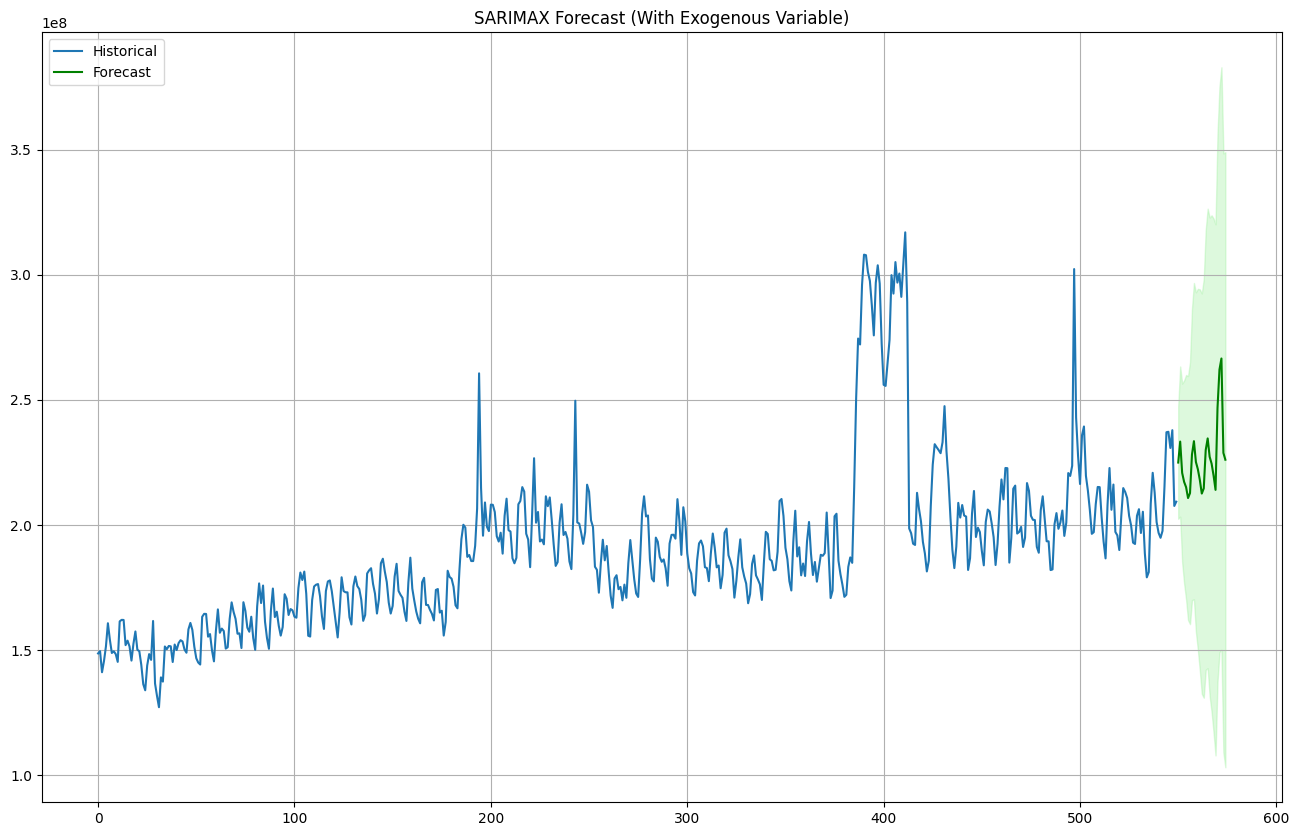

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Prepare exogenous variable
exog = sarima_df[["Exog"]]

# Fit SARIMAX model with exog
model = SARIMAX(sarima_df["Views"], exog=exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
model_fit = model.fit(disp=False)

# Forecast (you must provide future exog values too — here using last known values as example)
future_exog = exog.iloc[-25:].copy()  # Replace with actual future exog if you have
forecast = model_fit.get_forecast(steps=25, exog=future_exog)

# Plot forecast
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(16, 10))
plt.plot(sarima_df["Views"], label="Historical")
plt.plot(forecast_mean.index, forecast_mean, label="Forecast", color="green")
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color="lightgreen", alpha=0.3)
plt.title("SARIMAX Forecast (With Exogenous Variable)")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


## Facebook Prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wsd_h9g/nmfus9sq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wsd_h9g/mbkt693b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68780', 'data', 'file=/tmp/tmp6wsd_h9g/nmfus9sq.json', 'init=/tmp/tmp6wsd_h9g/mbkt693b.json', 'output', 'file=/tmp/tmp6wsd_h9g/prophet_model6kfm183r/prophet_model-20250420095219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:52:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:52:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


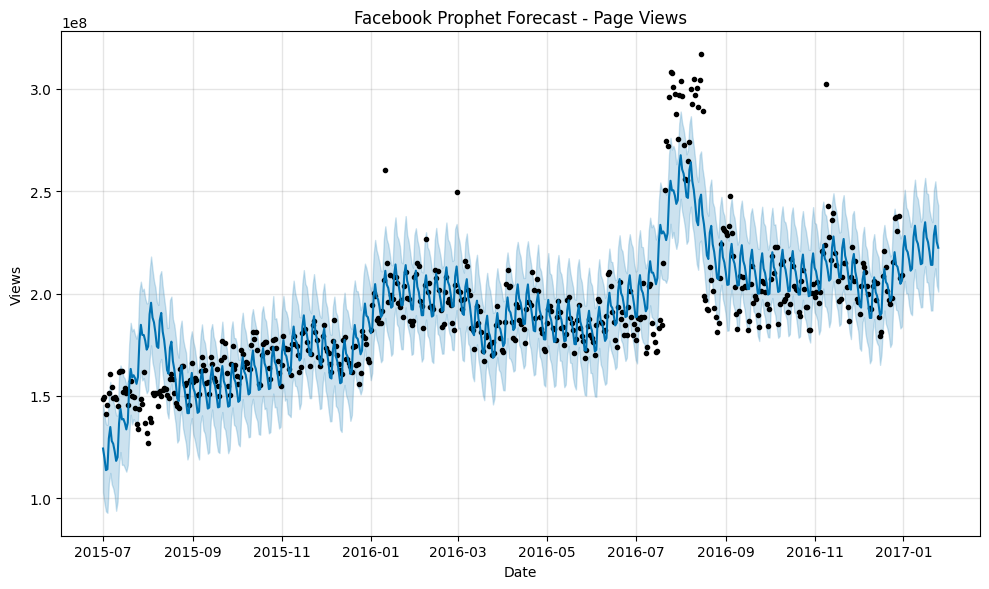

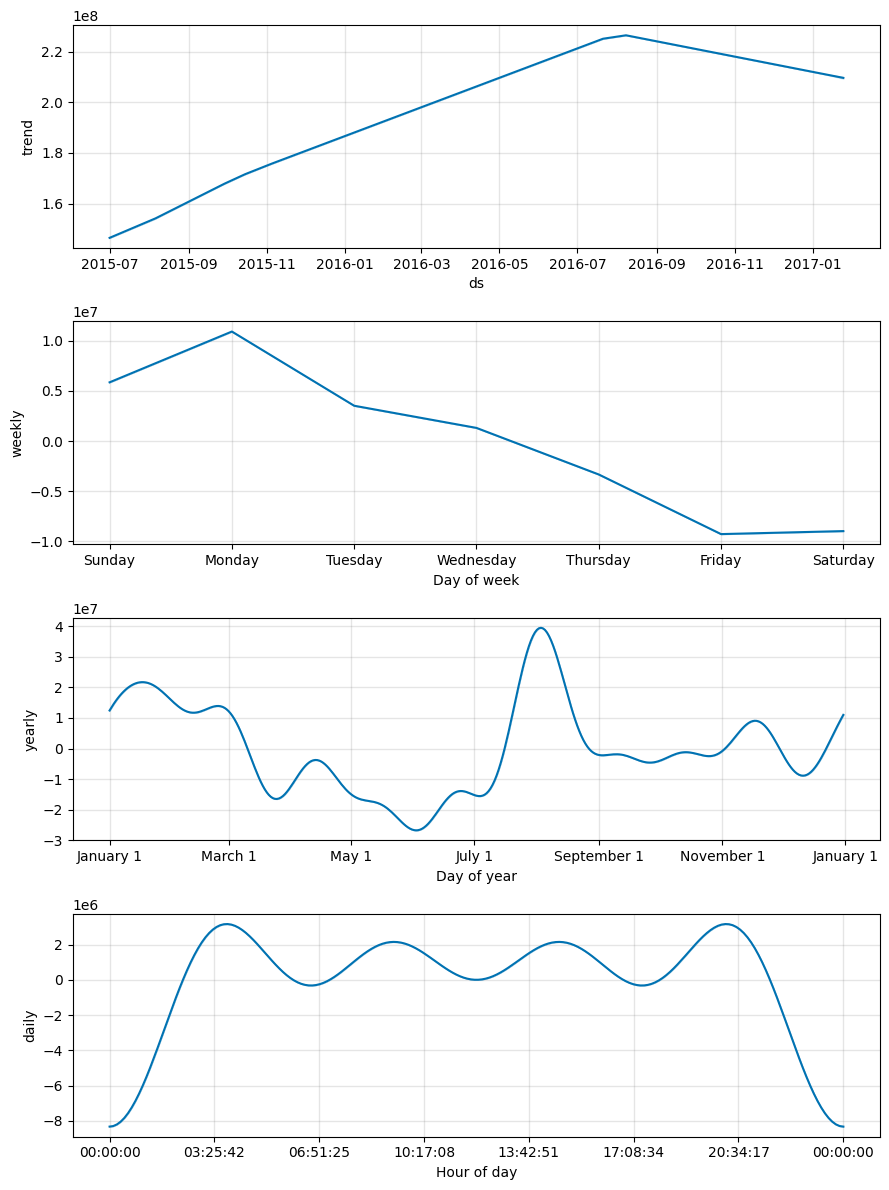

In [ ]:
from prophet import Prophet

# Step 1: Prepare data
# Reset index if Date is the index
df_prophet = df_agg[["Views"]].reset_index()
df_prophet.columns = ["ds", "y"]  # Prophet expects 'ds' and 'y'

# Step 2: Initialize and train model
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model.fit(df_prophet)

# Step 3: Make future dataframe (e.g., next 25 days)
future = model.make_future_dataframe(periods=25)
forecast = model.predict(future)

# Step 4: Plot forecast
model.plot(forecast)
plt.title("Facebook Prophet Forecast - Page Views")
plt.xlabel("Date")
plt.ylabel("Views")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Plot forecast components (trend, seasonality)
model.plot_components(forecast)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Merge actual and predicted values
df_merge = pd.merge(df_prophet, forecast[['ds', 'yhat']], on='ds')

# Calculate metrics
mae = mean_absolute_error(df_merge['y'], df_merge['yhat'])
rmse = np.sqrt(mean_squared_error(df_merge['y'], df_merge['yhat']))
mape = np.mean(np.abs((df_merge['y'] - df_merge['yhat']) / df_merge['y'])) * 100

# Print results
print(f"MAE  : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"MAPE : {mape:.2f}%")


MAE  : 11,543,621.36
RMSE : 16,884,751.63
MAPE : 6.02%


# Lets train a ARIMA Model for single Language i.e English

In [ ]:
df_en = df[df["Page"].str.contains("_en.wikipedia.org")].reset_index(drop=True)



In [ ]:
df_en.head()

Page  01-07-2015  02-07-2015  \
0          !vote_en.wikipedia.org_desktop_all-agents         3.0         4.0   
1  "Awaken,_My_Love!"_en.wikipedia.org_desktop_al...         NaN         NaN   
2  "European_Society_for_Clinical_Investigation"_...         NaN         NaN   
3  "Weird_Al"_Yankovic_en.wikipedia.org_desktop_a...      2403.0     20136.0   
4     100_metres_en.wikipedia.org_desktop_all-agents       982.0       881.0   

   03-07-2015  04-07-2015  05-07-2015  06-07-2015  07-07-2015  08-07-2015  \
0         7.0         4.0         4.0         2.0         3.0         7.0   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3      1850.0      1432.0      1351.0      1792.0      1710.0      2039.0   
4       794.0       979.0      1191.0      1057.0      1184.0       860.0   

   09-07-2015  ...  22-12-2016  23-12-2016  24-12-2016  25-12-2016  \
0         2.0  ...         3.0         1.0         6.0         3.0   
1         NaN  ...      2898.0      2676.0      2032.0      2294.0   
2         1.0  ...         1.0         NaN         NaN         NaN   
3      1957.0  ...      1401.0      1238.0       976.0       810.0   
4      1259.0  ...       404.0       344.0       225.0       229.0   

   26-12-2016  27-12-2016  28-12-2016  29-12-2016  30-12-2016  31-12-2016  
0         1.0         1.0         3.0         3.0         1.0         0.0  
1      2074.0      2175.0      2156.0      2302.0      2098.0      1770.0  
2         NaN         NaN         NaN         NaN         1.0         2.0  
3       989.0      1332.0      1243.0      1681.0      1303.0      1098.0  
4       335.0       313.0       379.0       393.0       354.0       272.0  

[5 rows x 551 columns]

In [ ]:
df_en.shape

(24108, 551)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Selected Page: Main_Page_en.wikipedia.org_desktop_all-agents
MAE: 1393521.19
RMSE: 1736075.23
MAPE: 7.83%


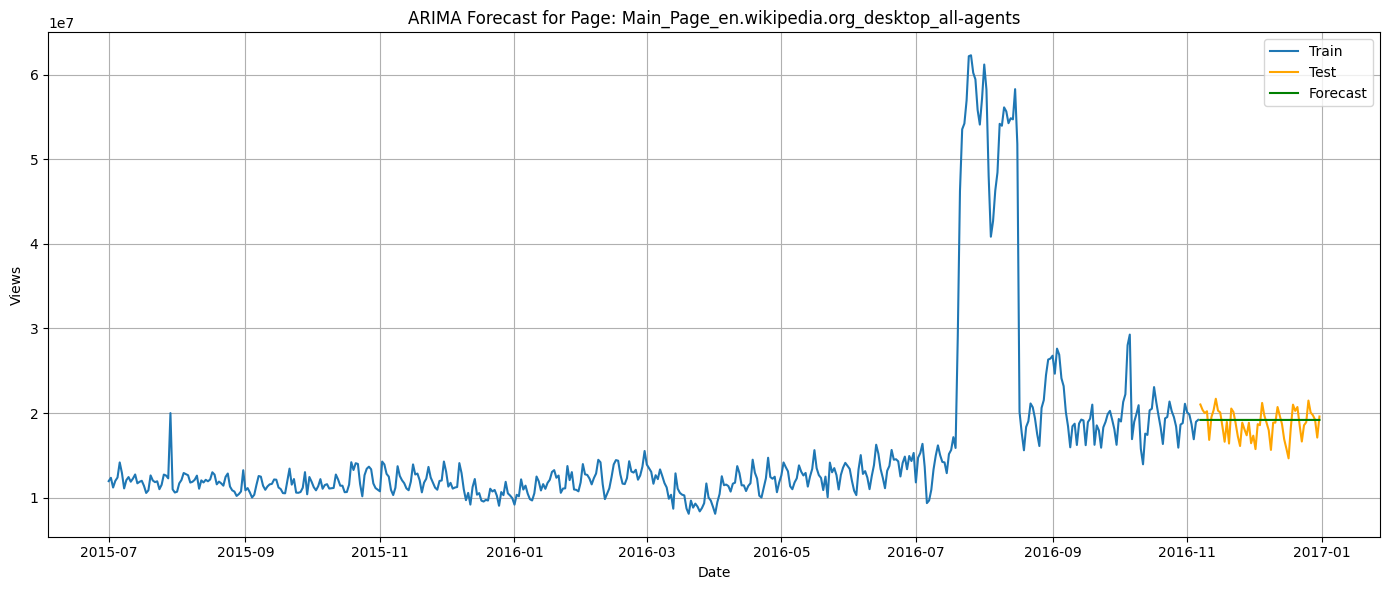

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Filter for a language first (like 'en'), using string match
df_en = df[df["Page"].str.contains("_en.wikipedia.org")].reset_index(drop=True)

# Choose a good page (e.g., highest variance)
variances = df_en.drop(columns="Page").var(axis=1)
selected_idx = variances.idxmax()
selected_row = df_en.loc[selected_idx]

# Convert that row into a time series
page_name = selected_row["Page"]
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)

# Clean the data
views = views.fillna(0)


# Train-test split
split_idx = int(len(views) * 0.9)
train = views.iloc[:split_idx]
test = views.iloc[split_idx:]

# Train ARIMA
model = ARIMA(train, order=(1, 1, 1))  # (p, d, q)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluation
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")



# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="green")
plt.title(f"ARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Hyperparameter Tunning for ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Selected Page: Main_Page_en.wikipedia.org_desktop_all-agents
Best ARIMA Order: (2, 1, 2)
MAE: 1064733.81
RMSE: 1292890.43


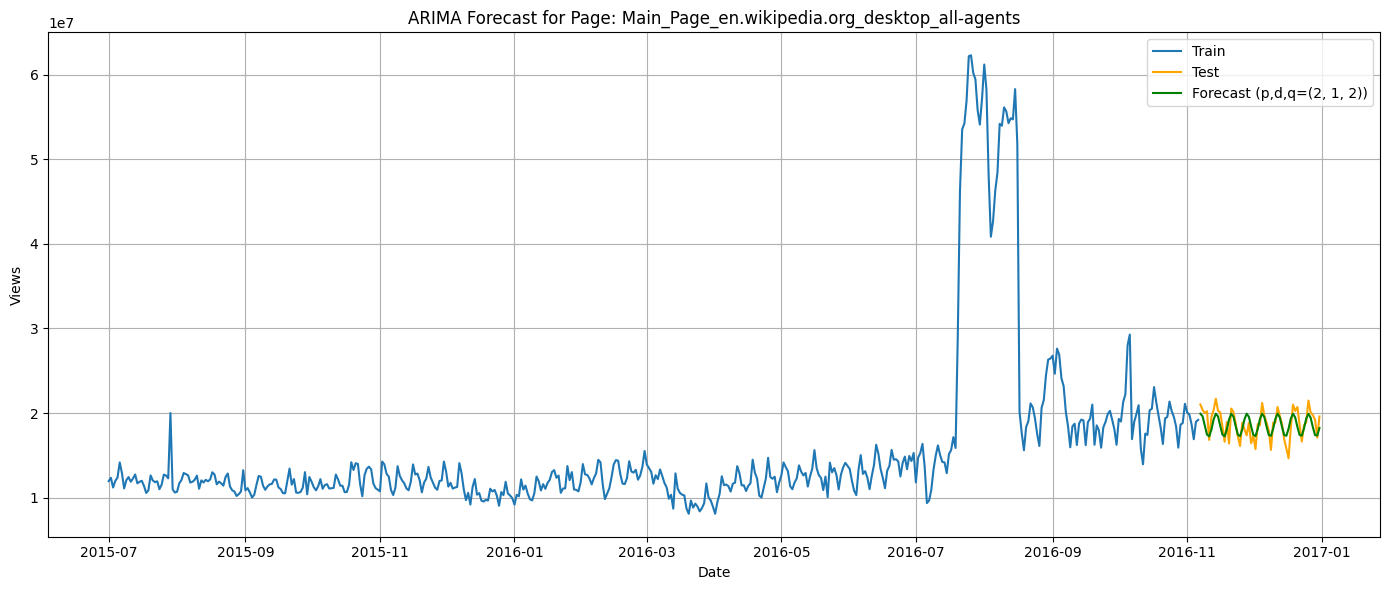

In [ ]:
# Hyperparameter tuning for ARIMA
best_rmse = float("inf")
best_order = None
best_forecast = None

# Try combinations of p, d, q
for p in [0, 1, 2]:
    for d in [0, 1,2]:
        for q in [0, 1, 2]:
            try:
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                forecast = model_fit.forecast(steps=len(test))
                rmse = np.sqrt(mean_squared_error(test, forecast))

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = (p, d, q)
                    best_forecast = forecast
            except:
                continue

# Evaluation
mae = mean_absolute_error(test, best_forecast)
rmse = best_rmse

print(f"Selected Page: {page_name}")
print(f"Best ARIMA Order: {best_order}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, best_forecast, label=f"Forecast (p,d,q={best_order})", color="green")
plt.title(f"ARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Evaluation
mae = mean_absolute_error(test, best_forecast)
rmse = best_rmse
mape = np.mean(np.abs((test - best_forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"Best ARIMA Order: {best_order}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


Selected Page: Main_Page_en.wikipedia.org_desktop_all-agents
Best ARIMA Order: (2, 1, 2)
MAE: 1064733.81
RMSE: 1292890.43
MAPE: 5.80%


## SARIMA Without tunning

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Selected Page: Main_Page_en.wikipedia.org_desktop_all-agents
MAE: 1945130.12
RMSE: 2261977.72
MAPE: 10.34%


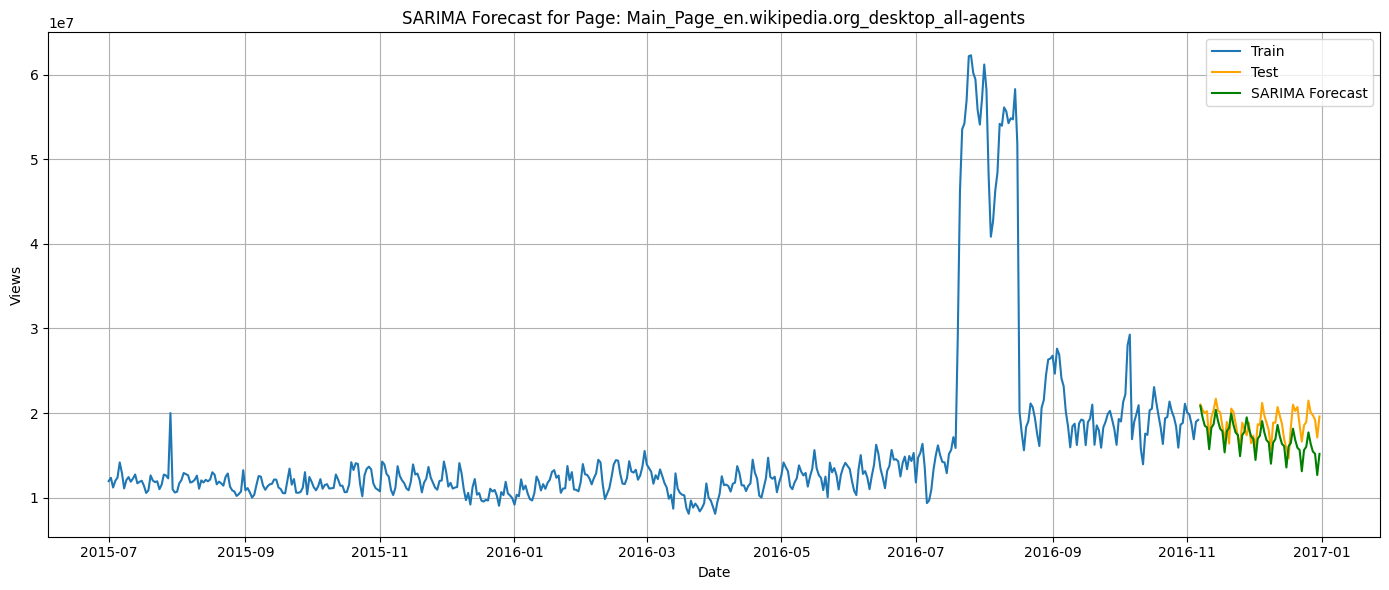

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Filter for 'en' language pages
df_en = df[df["Page"].str.contains("_en.wikipedia.org")].reset_index(drop=True)

# Select the page with highest variance (you can change this manually too)
variances = df_en.drop(columns="Page").var(axis=1)
selected_idx = variances.idxmax()
selected_row = df_en.loc[selected_idx]
page_name = selected_row["Page"]

# Convert to time series
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)
views = views.fillna(0)

# Train-test split
split_idx = int(len(views) * 0.9)
train = views.iloc[:split_idx]
test = views.iloc[split_idx:]

# SARIMA model
model = SARIMAX(train,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7),  # Weekly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

#  Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluation
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, forecast, label="SARIMA Forecast", color="green")
plt.title(f"SARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## SARIMA With Tunning

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Selected Page: Main_Page_en.wikipedia.org_desktop_all-agents
Best SARIMA Order: (2, 0, 1)
Best Seasonal Order: (1, 1, 0, 7)
MAE: 747244.94
RMSE: 1169599.76
MAPE: 4.25%


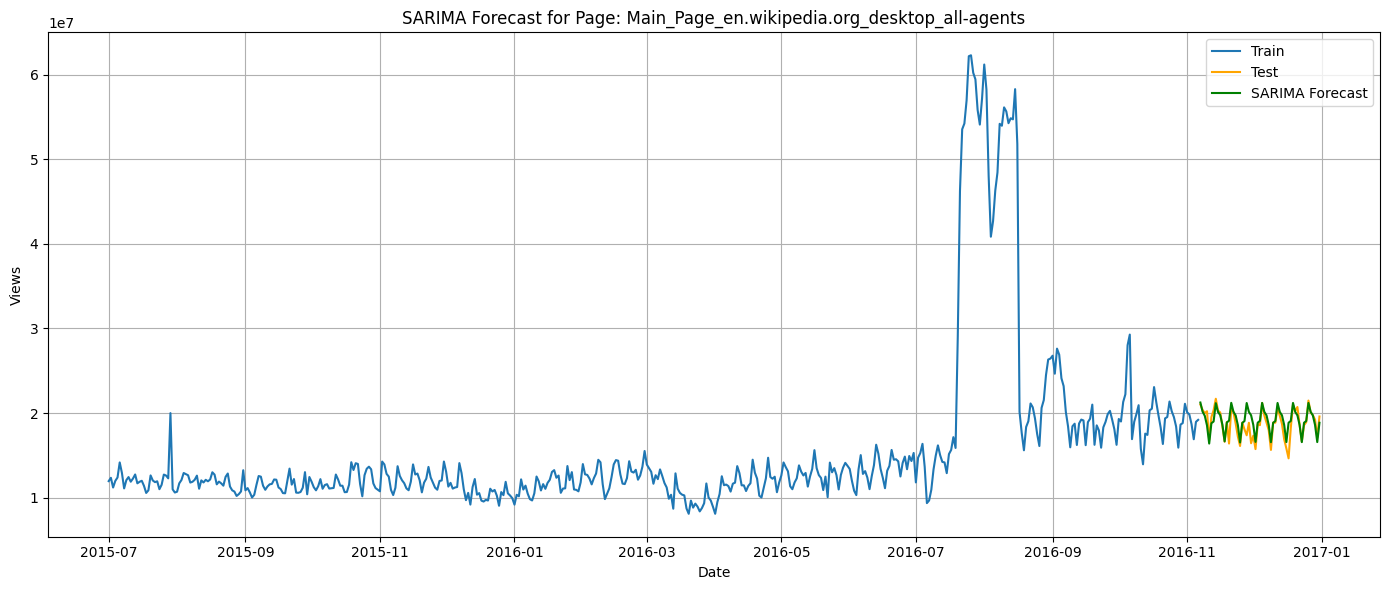

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Filter for 'en' language pages
df_en = df[df["Page"].str.contains("_en.wikipedia.org")].reset_index(drop=True)

# Pick the most variable page
variances = df_en.drop(columns="Page").var(axis=1)
selected_idx = variances.idxmax()
selected_row = df_en.loc[selected_idx]
page_name = selected_row["Page"]

#  Convert row to time series
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)
views = views.fillna(0)

#  Train-test split
split_idx = int(len(views) * 0.9)
train = views.iloc[:split_idx]
test = views.iloc[split_idx:]

# SARIMA Hyperparameter tuning

best_order = None
best_seasonal_order = None
best_rmse = float("inf")
best_forecast = None

# Try a few combinations of (p,d,q) and (P,D,Q,s)
for p in range(0, 3):
    for d in range(0, 2):
        for q in range(0, 3):
            for P in range(0, 2):
                for D in range(0, 2):
                    for Q in range(0, 2):
                        try:
                            model = SARIMAX(train,
                                            order=(p, d, q),
                                            seasonal_order=(P, D, Q, 7),  # 7-day weekly seasonality
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
                            model_fit = model.fit(disp=False)
                            forecast = model_fit.forecast(steps=len(test))
                            rmse = np.sqrt(mean_squared_error(test, forecast))

                            if rmse < best_rmse:
                                best_rmse = rmse
                                best_order = (p, d, q)
                                best_seasonal_order = (P, D, Q, 7)
                                best_forecast = forecast
                        except:
                            continue

# Evaluate
mae = mean_absolute_error(test, best_forecast)
mape = np.mean(np.abs((test - best_forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"Best SARIMA Order: {best_order}")
print(f"Best Seasonal Order: {best_seasonal_order}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {best_rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

#  Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, best_forecast, label="SARIMA Forecast", color="green")
plt.title(f"SARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Facebook Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wsd_h9g/i28_zsf3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wsd_h9g/0oey_0c8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95355', 'data', 'file=/tmp/tmp6wsd_h9g/i28_zsf3.json', 'init=/tmp/tmp6wsd_h9g/0oey_0c8.json', 'output', 'file=/tmp/tmp6wsd_h9g/prophet_model73v9q8es/prophet_model-20250420091311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:13:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:13:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Selected Page: Main_Page_en.wikipedia.org_desktop_all-agents
MAE: 2407341.97
RMSE: 2707681.42
MAPE: 13.43%


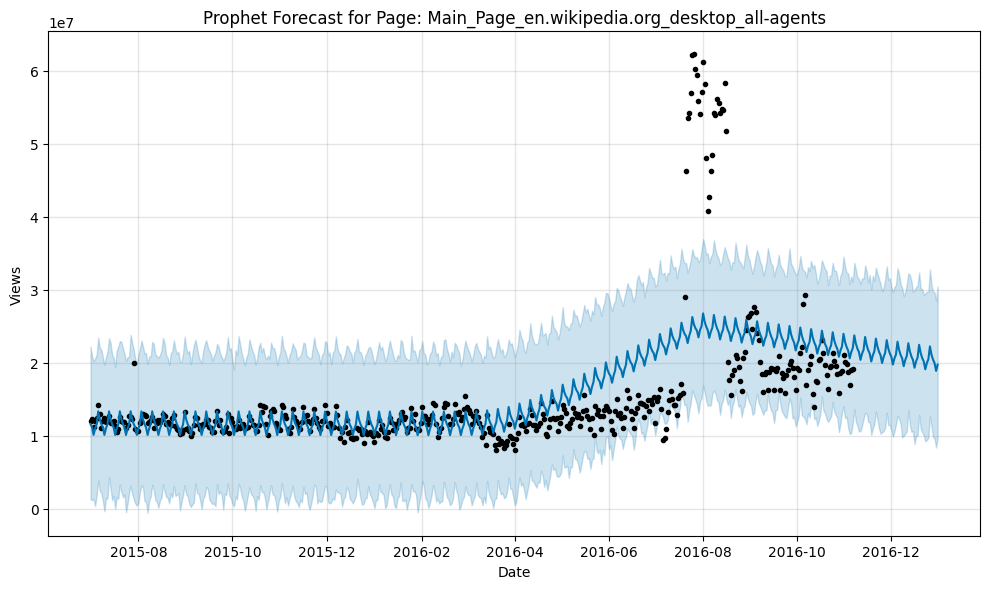

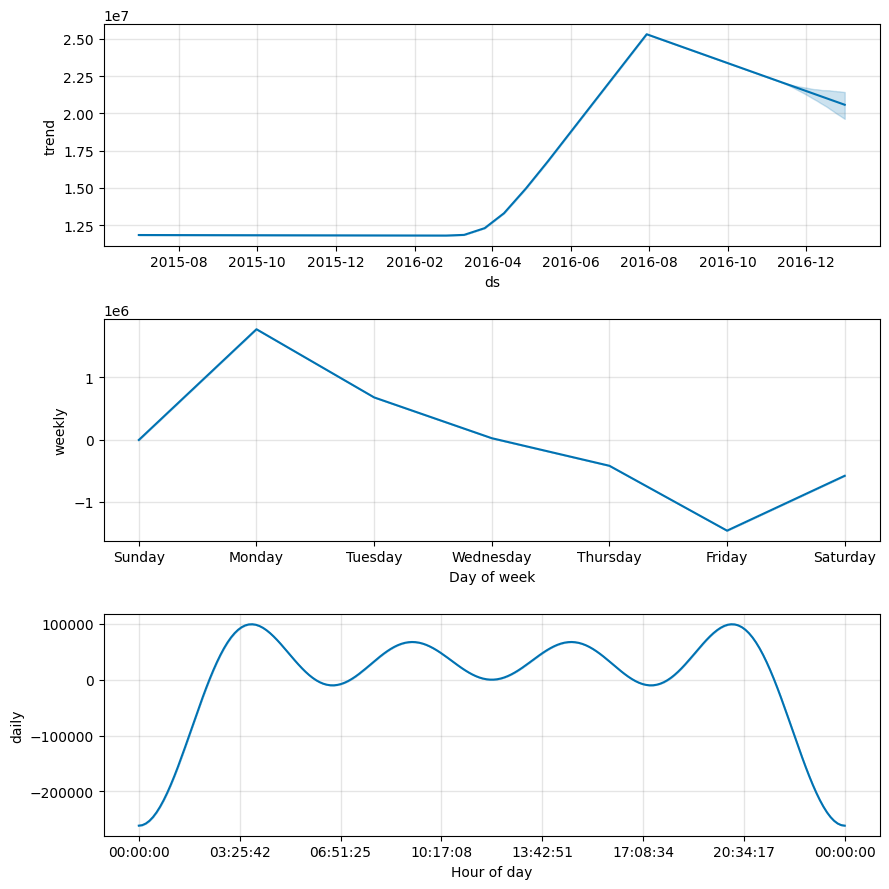

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare data for Prophet
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)
views = views.fillna(0)

# Prophet ds (date) and y (value)
df_prophet = pd.DataFrame({
    "ds": views.index,
    "y": views.values
})

#  Train-test split
split_idx = int(len(df_prophet) * 0.9)
train = df_prophet.iloc[:split_idx]
test = df_prophet.iloc[split_idx:]

#  Fit Prophet model
model = Prophet(daily_seasonality=True)
model.fit(train)

#  Forecast
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Evaluation
predicted = forecast.iloc[-len(test):]["yhat"].values
actual = test["y"].values
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f"Selected Page: {page_name}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

#  Plot forecast
fig1 = model.plot(forecast)
plt.title(f"Prophet Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.tight_layout()
plt.show()

# plot components
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()

# Lets train for another language i.e Chinese "*zh*"

## ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Selected Page: 福音戰士新劇場版：Q_zh.wikipedia.org_all-access_all-agents
MAE: 1948.88
RMSE: 1950.26
MAPE: 1479.08%


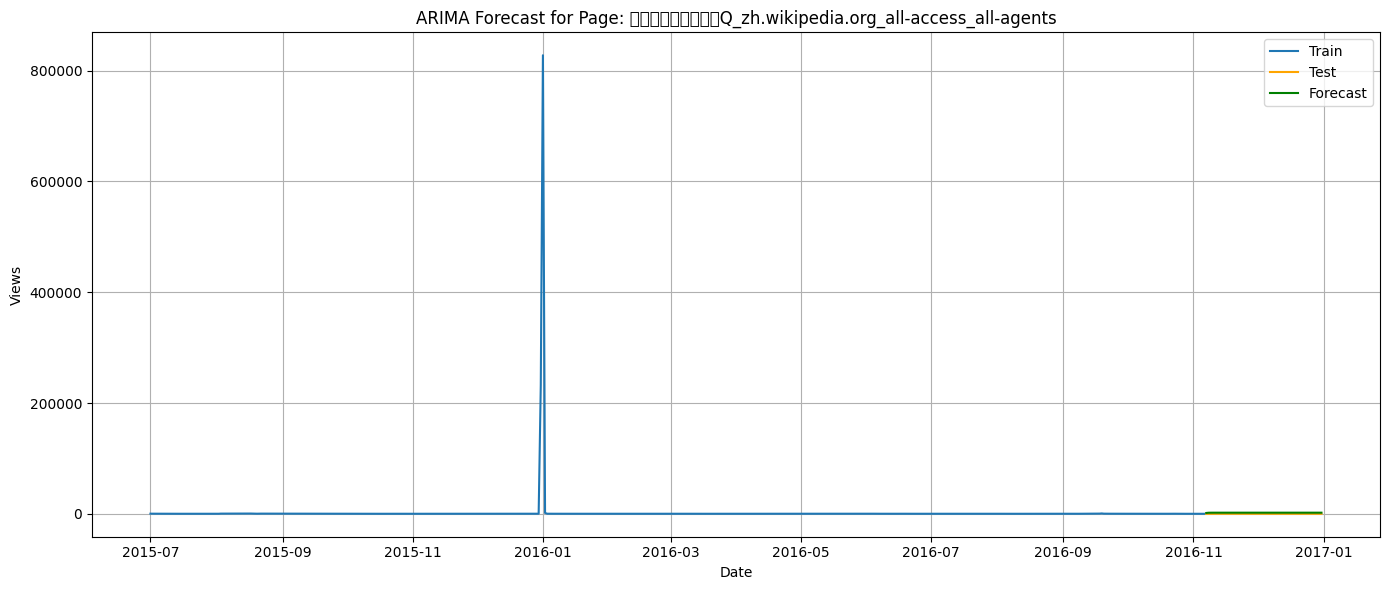

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Filter for a language first (like 'zh'), using string match
df_zh = df[df["Page"].str.contains("_zh.wikipedia.org")].reset_index(drop=True)

# Choose a good page (e.g., highest variance)
variances = df_zh.drop(columns="Page").var(axis=1)
selected_idx = variances.idxmax()
selected_row = df_zh.loc[selected_idx]

# Convert that row into a time series
page_name = selected_row["Page"]
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)

# Clean the data

views = views.fillna(0)


# Train-test split
split_idx = int(len(views) * 0.9)
train = views.iloc[:split_idx]
test = views.iloc[split_idx:]

#Train ARIMA
model = ARIMA(train, order=(1, 1, 1))  # (p, d, q)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluation
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")



#  Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="green")
plt.title(f"ARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Hyperparameter tunning for ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Selected Page: 福音戰士新劇場版：Q_zh.wikipedia.org_all-access_all-agents
Best ARIMA Order: (1, 2, 1)
MAE: 24.89
RMSE: 29.74


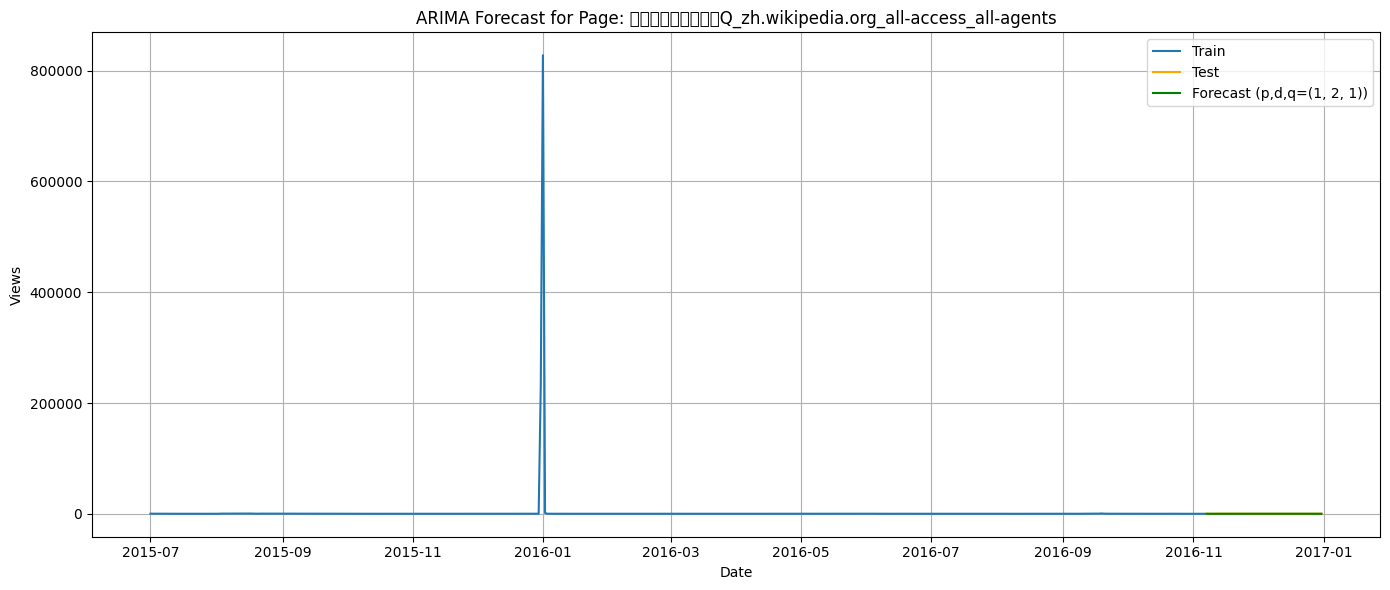

In [ ]:
# Hyperparameter tuning for ARIMA
best_rmse = float("inf")
best_order = None
best_forecast = None

# Try combinations of p, d, q
for p in [0, 1, 2]:
    for d in [0, 1,2]:
        for q in [0, 1, 2]:
            try:
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                forecast = model_fit.forecast(steps=len(test))
                rmse = np.sqrt(mean_squared_error(test, forecast))

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = (p, d, q)
                    best_forecast = forecast
            except:
                continue

#  Evaluation
mae = mean_absolute_error(test, best_forecast)
rmse = best_rmse

print(f"Selected Page: {page_name}")
print(f"Best ARIMA Order: {best_order}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, best_forecast, label=f"Forecast (p,d,q={best_order})", color="green")
plt.title(f"ARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#  Evaluation
mae = mean_absolute_error(test, best_forecast)
rmse = best_rmse
mape = np.mean(np.abs((test - best_forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"Best ARIMA Order: {best_order}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


Selected Page: 福音戰士新劇場版：Q_zh.wikipedia.org_all-access_all-agents
Best ARIMA Order: (1, 2, 1)
MAE: 24.89
RMSE: 29.74
MAPE: 18.18%


## SARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Selected Page: 福音戰士新劇場版：Q_zh.wikipedia.org_all-access_all-agents
MAE: 684.05
RMSE: 932.57
MAPE: 515.51%


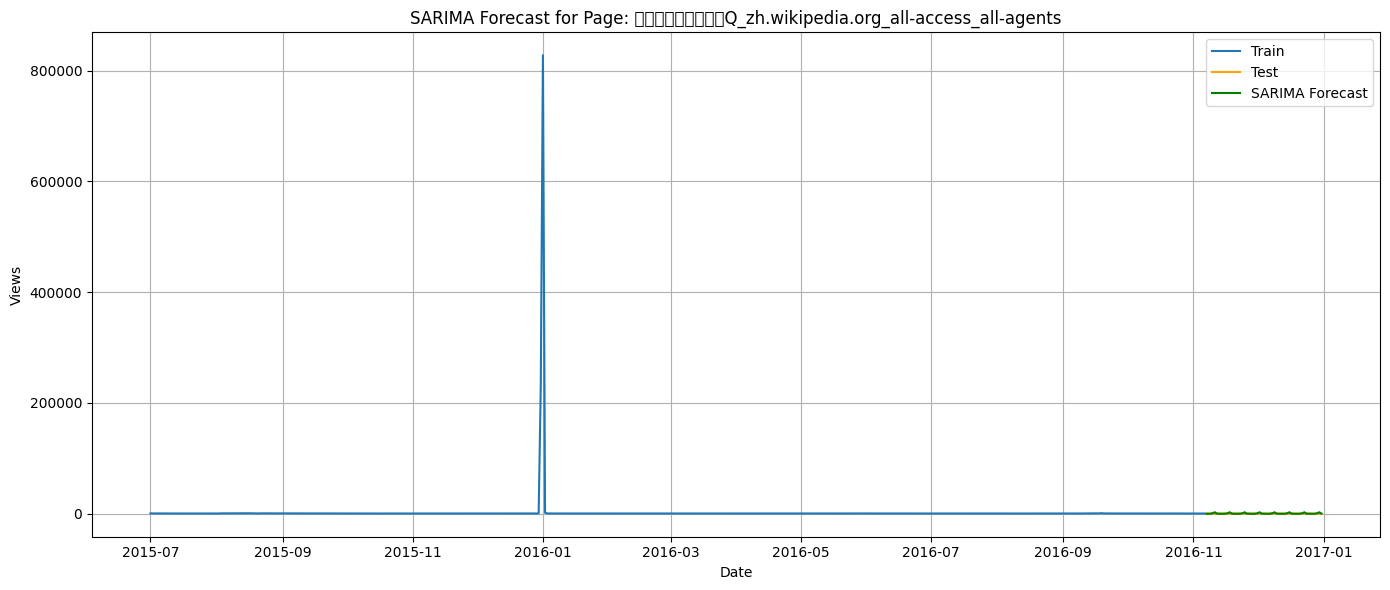

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Filter for 'zh' language pages
df_zh = df[df["Page"].str.contains("_zh.wikipedia.org")].reset_index(drop=True)

# Select the page with highest variance
variances = df_zh.drop(columns="Page").var(axis=1)
selected_idx = variances.idxmax()
selected_row = df_zh.loc[selected_idx]
page_name = selected_row["Page"]

# Convert to time series
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)
views = views.fillna(0)

# Train-test split
split_idx = int(len(views) * 0.9)
train = views.iloc[:split_idx]
test = views.iloc[split_idx:]

#  SARIMA model
model = SARIMAX(train,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7),  # Weekly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

#  Forecast
forecast = model_fit.forecast(steps=len(test))

#  Evaluation
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, forecast, label="SARIMA Forecast", color="green")
plt.title(f"SARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Hyperparametr tunning for SARIMA

Selected Page: 福音戰士新劇場版：Q_zh.wikipedia.org_all-access_all-agents
Best SARIMA Order: (2, 1, 0)
Best Seasonal Order: (0, 1, 0, 7)
MAE: 24.85
RMSE: 30.44
MAPE: 17.51%


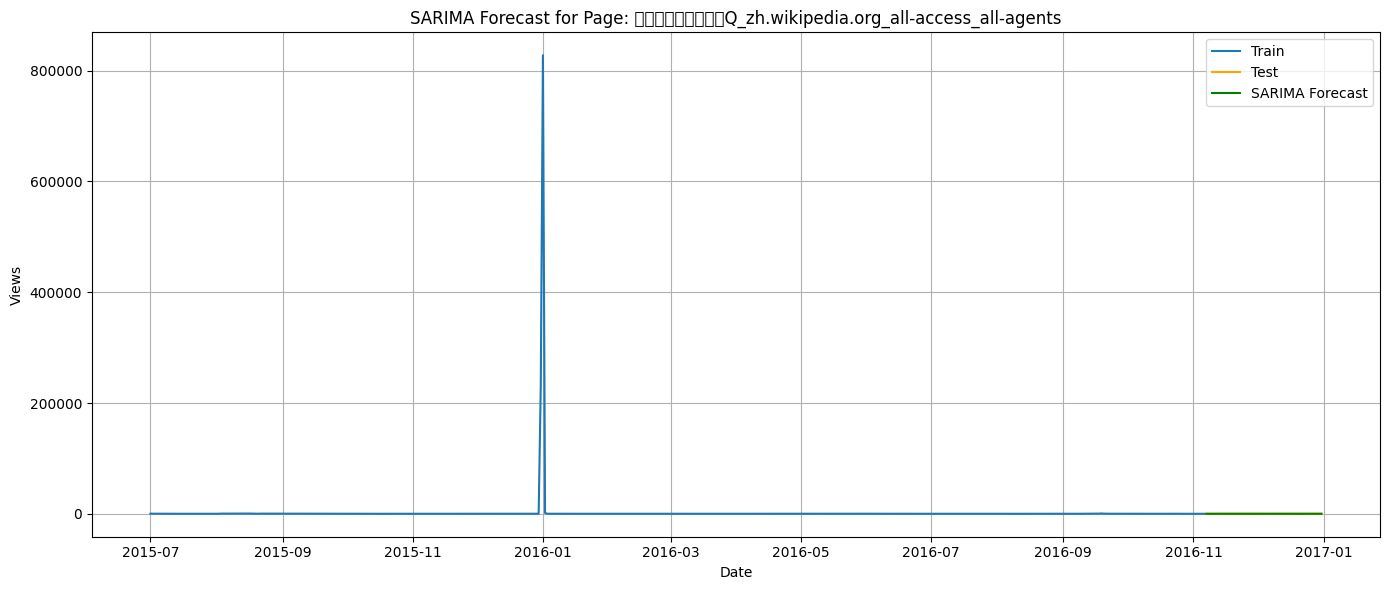

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error



# Filter for 'zh' language pages
df_zh = df[df["Page"].str.contains("_zh.wikipedia.org")].reset_index(drop=True)

#  Pick the most variable page
variances = df_zh.drop(columns="Page").var(axis=1)
selected_idx = variances.idxmax()
selected_row = df_zh.loc[selected_idx]
page_name = selected_row["Page"]

# Convert row to time series
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)
views = views.fillna(0)

#  Train-test split
split_idx = int(len(views) * 0.9)
train = views.iloc[:split_idx]
test = views.iloc[split_idx:]

#  SARIMA Hyperparameter tuning
import warnings
warnings.filterwarnings("ignore")

best_order = None
best_seasonal_order = None
best_rmse = float("inf")
best_forecast = None

# Try a few combinations of (p,d,q) and (P,D,Q,s)
for p in range(0, 3):
    for d in range(0, 2):
        for q in range(0, 3):
            for P in range(0, 2):
                for D in range(0, 2):
                    for Q in range(0, 2):
                        try:
                            model = SARIMAX(train,
                                            order=(p, d, q),
                                            seasonal_order=(P, D, Q, 7),  # 7-day weekly seasonality
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
                            model_fit = model.fit(disp=False)
                            forecast = model_fit.forecast(steps=len(test))
                            rmse = np.sqrt(mean_squared_error(test, forecast))

                            if rmse < best_rmse:
                                best_rmse = rmse
                                best_order = (p, d, q)
                                best_seasonal_order = (P, D, Q, 7)
                                best_forecast = forecast
                        except:
                            continue

#  Evaluate
mae = mean_absolute_error(test, best_forecast)
mape = np.mean(np.abs((test - best_forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"Best SARIMA Order: {best_order}")
print(f"Best Seasonal Order: {best_seasonal_order}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {best_rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, best_forecast, label="SARIMA Forecast", color="green")
plt.title(f"SARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Facebook Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wsd_h9g/ounjuuif.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wsd_h9g/mlorfryj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18633', 'data', 'file=/tmp/tmp6wsd_h9g/ounjuuif.json', 'init=/tmp/tmp6wsd_h9g/mlorfryj.json', 'output', 'file=/tmp/tmp6wsd_h9g/prophet_model0gvos6n0/prophet_model-20250420091653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:16:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:16:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Selected Page: 福音戰士新劇場版：Q_zh.wikipedia.org_all-access_all-agents
MAE: 4916.02
RMSE: 5099.79
MAPE: 3689.21%


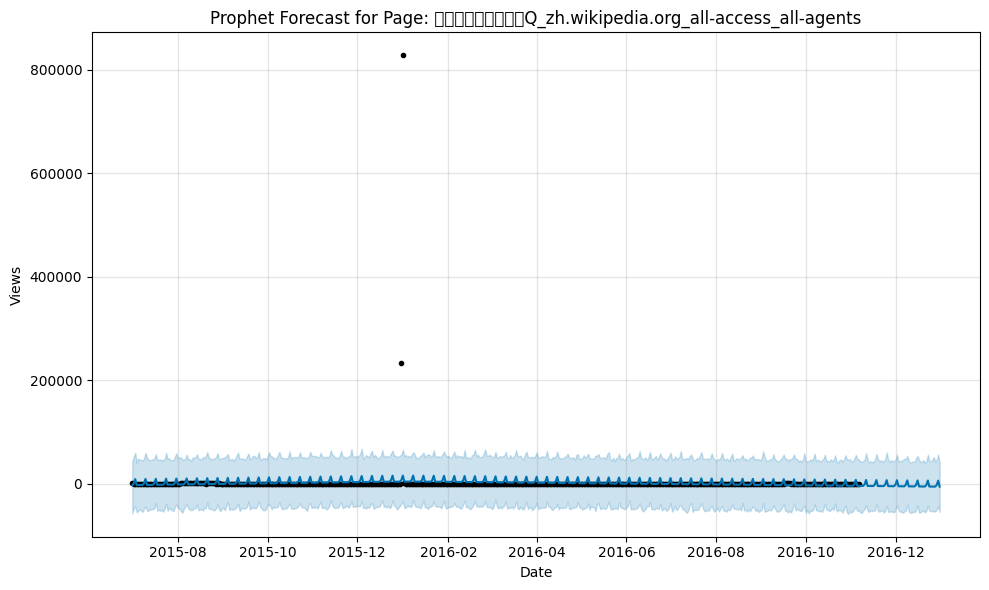

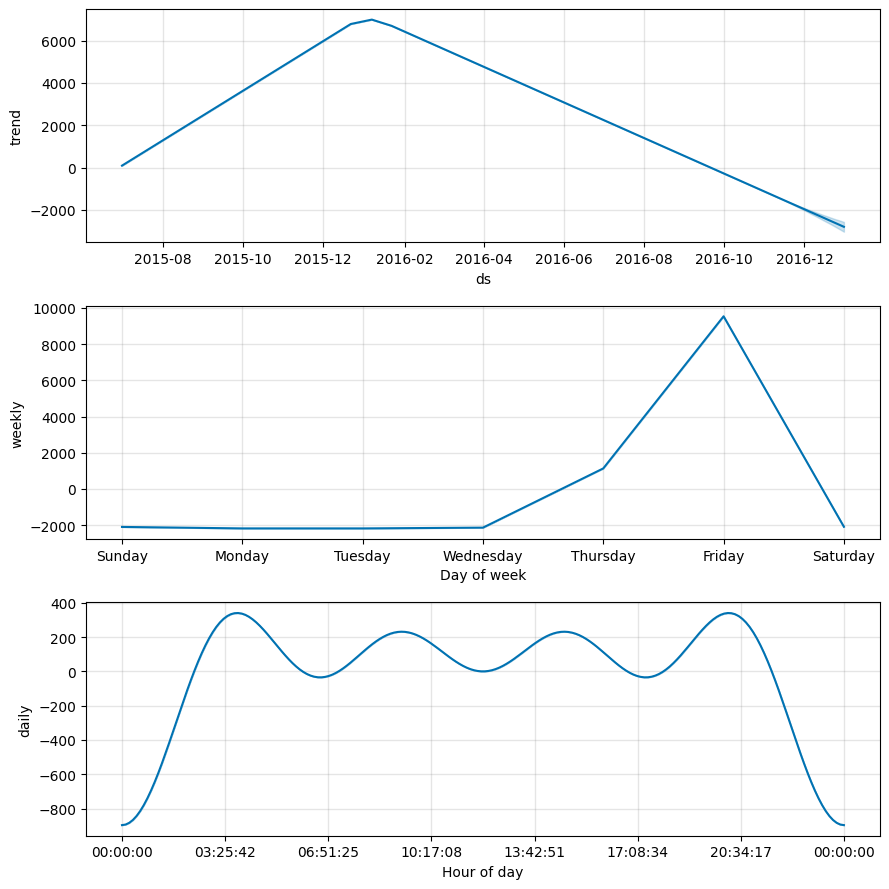

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  Prepare data for Prophet
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)
views = views.fillna(0)

# Prophet expects two columns: ds (date) and y (value)
df_prophet = pd.DataFrame({
    "ds": views.index,
    "y": views.values
})

# Train-test split
split_idx = int(len(df_prophet) * 0.9)
train = df_prophet.iloc[:split_idx]
test = df_prophet.iloc[split_idx:]

#Fit Prophet model
model = Prophet(daily_seasonality=True)
model.fit(train)

#  Forecast
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Evaluation
predicted = forecast.iloc[-len(test):]["yhat"].values
actual = test["y"].values
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f"Selected Page: {page_name}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

#  Plot forecast
fig1 = model.plot(forecast)
plt.title(f"Prophet Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.tight_layout()
plt.show()

# plot components
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()

# Lets train for another laguage i.e German "*de*"

## ARIMA

Selected Page: Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents
MAE: 272108.91
RMSE: 411737.27
MAPE: 8.51%


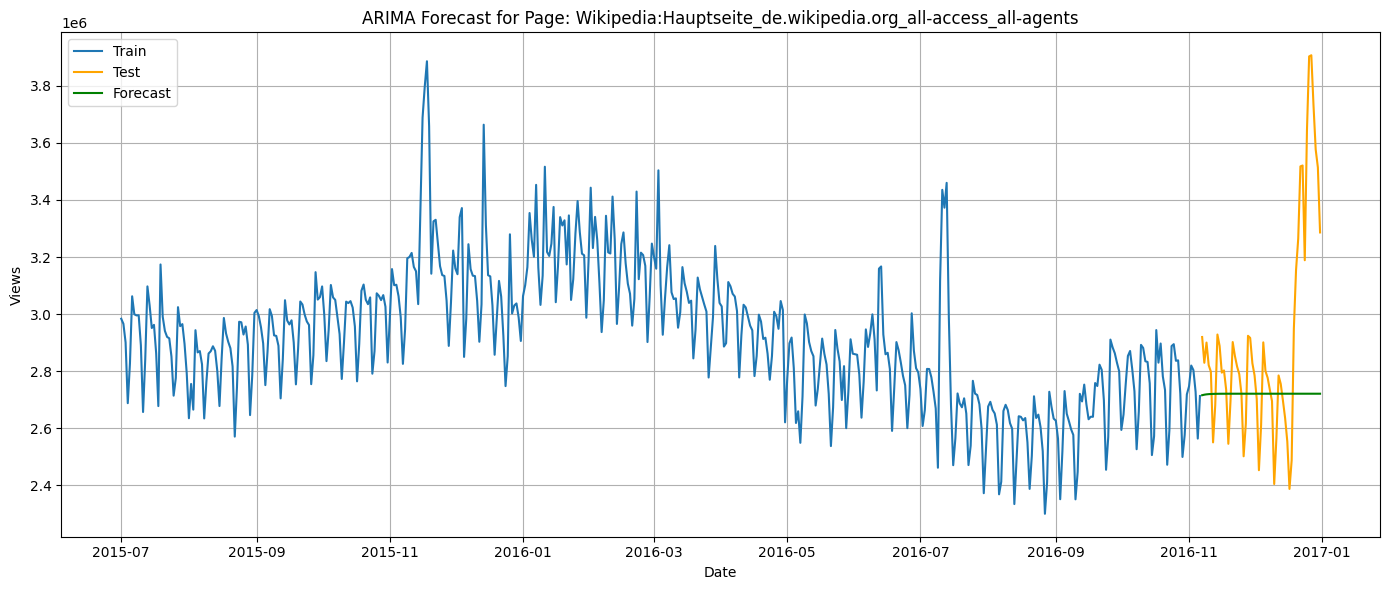

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Filter for a language first (like 'de'), using string match
df_de = df[df["Page"].str.contains("_de.wikipedia.org")].reset_index(drop=True)

#  Choose a good page (e.g., highest variance)
variances = df_de.drop(columns="Page").var(axis=1)
selected_idx = variances.idxmax()
selected_row = df_de.loc[selected_idx]

#  Convert that row into a time series
page_name = selected_row["Page"]
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)

# Clean the data

views = views.fillna(0)


# Train-test split
split_idx = int(len(views) * 0.9)
train = views.iloc[:split_idx]
test = views.iloc[split_idx:]

# Train ARIMA
model = ARIMA(train, order=(1, 1, 1))  # (p, d, q)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluation
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")



# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="green")
plt.title(f"ARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Hyperparameter Tunning

Selected Page: Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents
Best ARIMA Order: (1, 2, 2)
MAE: 246715.31
RMSE: 336330.79


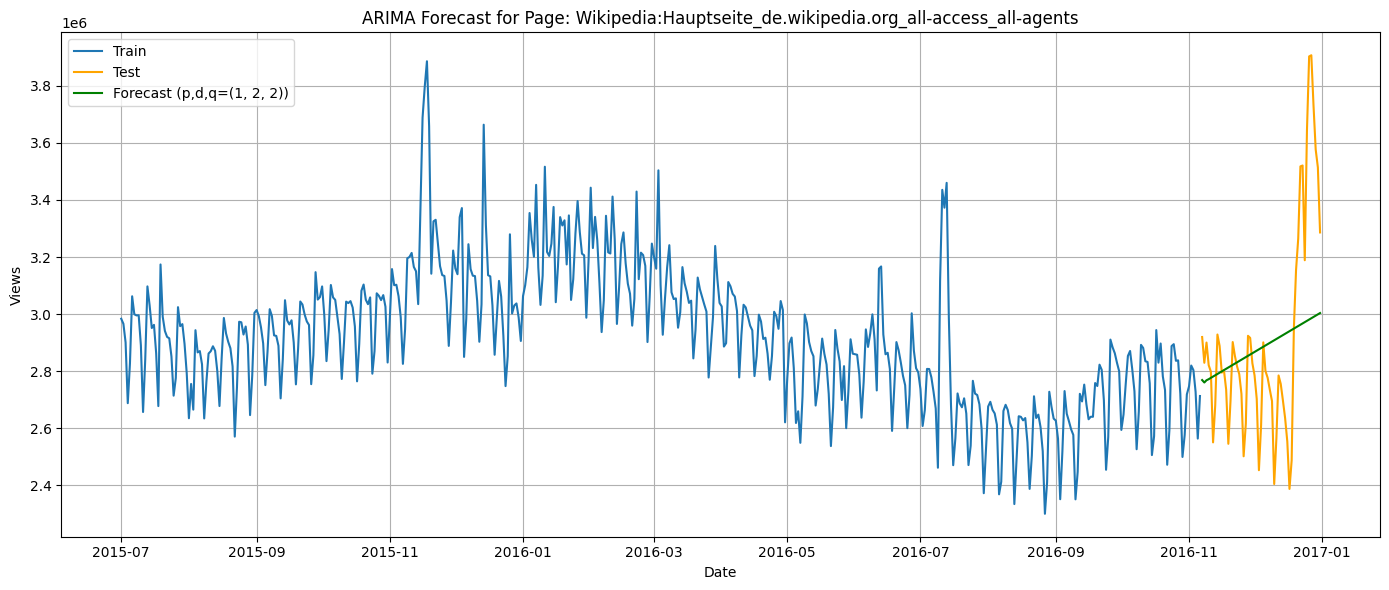

In [ ]:
# Hyperparameter tuning for ARIMA
best_rmse = float("inf")
best_order = None
best_forecast = None

# Try combinations of p, d, q
for p in [0, 1, 2]:
    for d in [0, 1,2]:
        for q in [0, 1, 2]:
            try:
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                forecast = model_fit.forecast(steps=len(test))
                rmse = np.sqrt(mean_squared_error(test, forecast))

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = (p, d, q)
                    best_forecast = forecast
            except:
                continue

# Evaluation
mae = mean_absolute_error(test, best_forecast)
rmse = best_rmse

print(f"Selected Page: {page_name}")
print(f"Best ARIMA Order: {best_order}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

#  Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, best_forecast, label=f"Forecast (p,d,q={best_order})", color="green")
plt.title(f"ARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#  Evaluation
mae = mean_absolute_error(test, best_forecast)
rmse = best_rmse
mape = np.mean(np.abs((test - best_forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"Best ARIMA Order: {best_order}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


Selected Page: Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents
Best ARIMA Order: (1, 2, 2)
MAE: 246715.31
RMSE: 336330.79
MAPE: 8.21%


## SARIMA

Selected Page: Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents
MAE: 242950.32
RMSE: 306709.24
MAPE: 8.15%


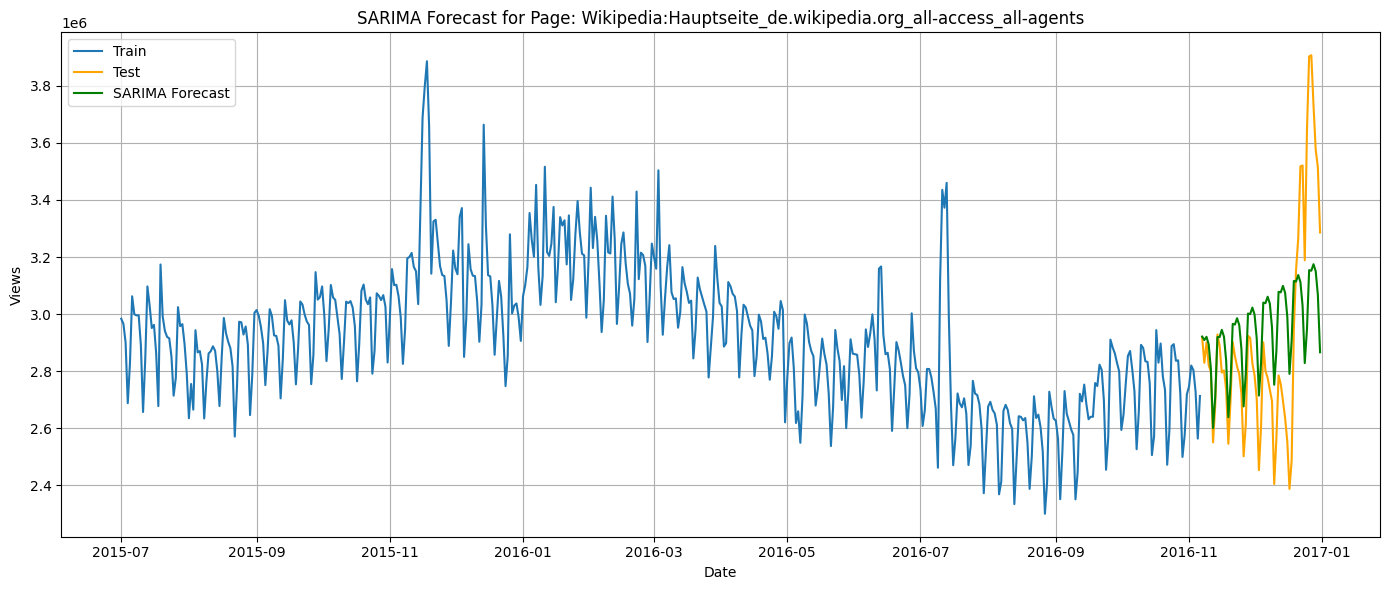

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Filter for 'de' language pages
df_de = df[df["Page"].str.contains("_de.wikipedia.org")].reset_index(drop=True)

#  Select the page with highest variance
variances = df_de.drop(columns="Page").var(axis=1)
selected_idx = variances.idxmax()
selected_row = df_de.loc[selected_idx]
page_name = selected_row["Page"]

# Convert to time series
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)
views = views.fillna(0)

#  Train-test split
split_idx = int(len(views) * 0.9)
train = views.iloc[:split_idx]
test = views.iloc[split_idx:]

#  SARIMA model
model = SARIMAX(train,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7),  # Weekly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

#  Forecast
forecast = model_fit.forecast(steps=len(test))

#  Evaluation
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

#  Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, forecast, label="SARIMA Forecast", color="green")
plt.title(f"SARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Hyperparameter tunning for SARIMA

Selected Page: Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents
Best SARIMA Order: (2, 1, 1)
Best Seasonal Order: (1, 1, 0, 7)
MAE: 243968.01
RMSE: 303720.06
MAPE: 8.30%


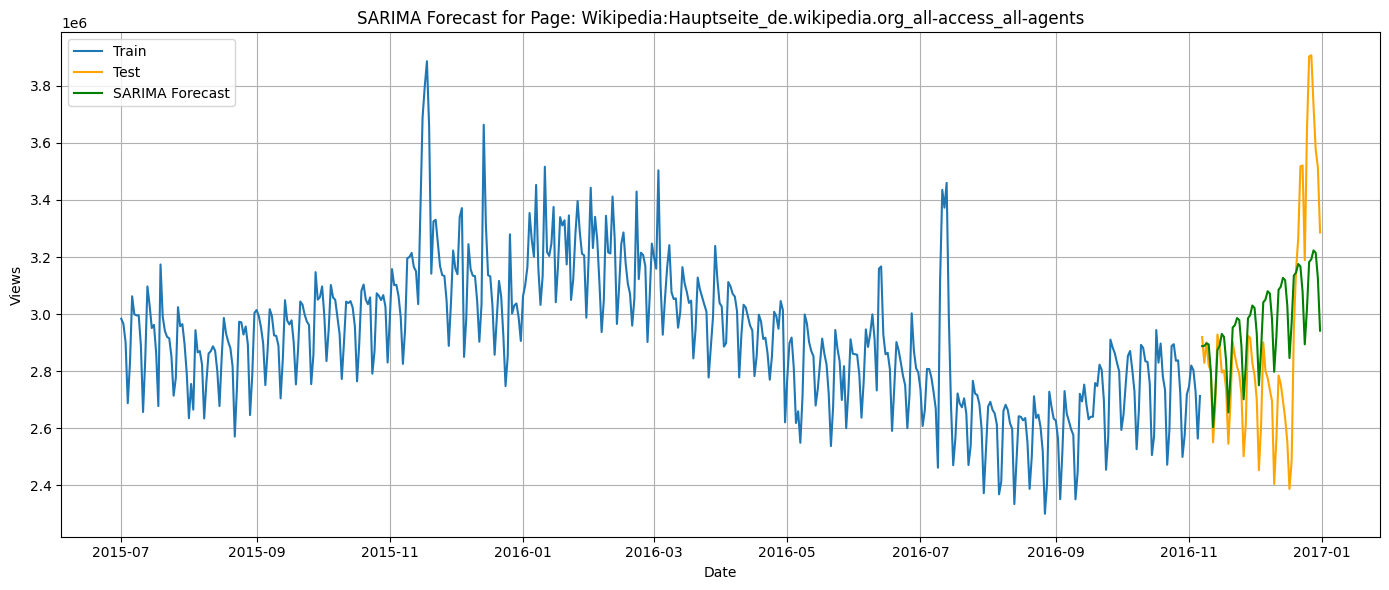

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Filter for 'de' language pages
df_de = df[df["Page"].str.contains("_de.wikipedia.org")].reset_index(drop=True)

#  Pick the most variable page
variances = df_de.drop(columns="Page").var(axis=1)
selected_idx = variances.idxmax()
selected_row = df_de.loc[selected_idx]
page_name = selected_row["Page"]

#  Convert row to time series
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)
views = views.fillna(0)

#  Train-test split
split_idx = int(len(views) * 0.9)
train = views.iloc[:split_idx]
test = views.iloc[split_idx:]

#  SARIMA Hyperparameter tuning
import warnings
warnings.filterwarnings("ignore")

best_order = None
best_seasonal_order = None
best_rmse = float("inf")
best_forecast = None

# Try a few combinations of (p,d,q) and (P,D,Q,s)
for p in range(0, 3):
    for d in range(0, 2):
        for q in range(0, 3):
            for P in range(0, 2):
                for D in range(0, 2):
                    for Q in range(0, 2):
                        try:
                            model = SARIMAX(train,
                                            order=(p, d, q),
                                            seasonal_order=(P, D, Q, 7),  # 7-day weekly seasonality
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
                            model_fit = model.fit(disp=False)
                            forecast = model_fit.forecast(steps=len(test))
                            rmse = np.sqrt(mean_squared_error(test, forecast))

                            if rmse < best_rmse:
                                best_rmse = rmse
                                best_order = (p, d, q)
                                best_seasonal_order = (P, D, Q, 7)
                                best_forecast = forecast
                        except:
                            continue

#  Evaluate
mae = mean_absolute_error(test, best_forecast)
mape = np.mean(np.abs((test - best_forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"Best SARIMA Order: {best_order}")
print(f"Best Seasonal Order: {best_seasonal_order}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {best_rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

#  Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, best_forecast, label="SARIMA Forecast", color="green")
plt.title(f"SARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Fcaebook Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wsd_h9g/nyovwdo2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wsd_h9g/x8219jmc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72967', 'data', 'file=/tmp/tmp6wsd_h9g/nyovwdo2.json', 'init=/tmp/tmp6wsd_h9g/x8219jmc.json', 'output', 'file=/tmp/tmp6wsd_h9g/prophet_modelrfjgotva/prophet_model-20250420092144.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:21:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:21:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Selected Page: Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents
MAE: 215090.57
RMSE: 375023.86
MAPE: 6.50%


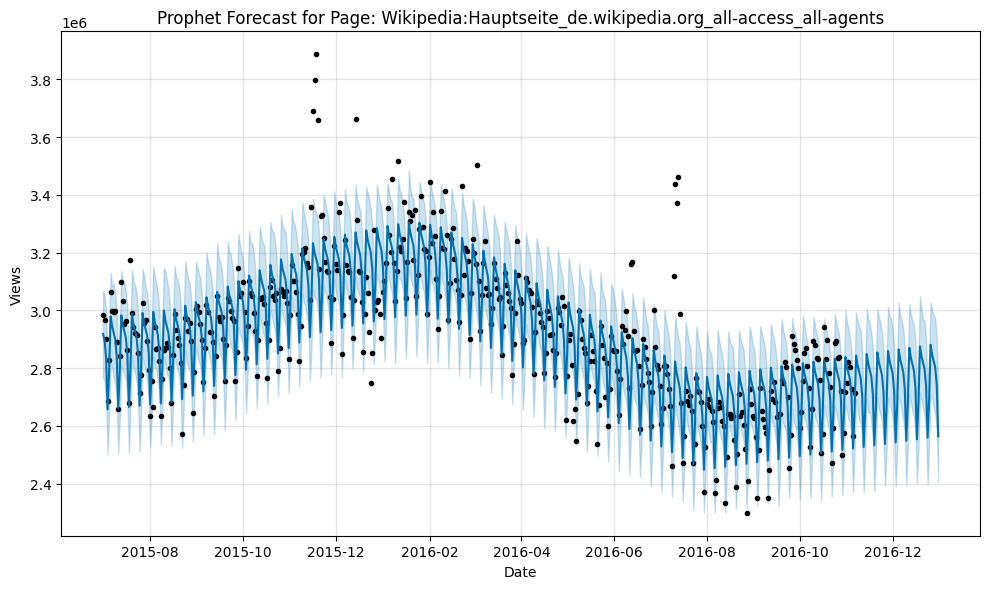

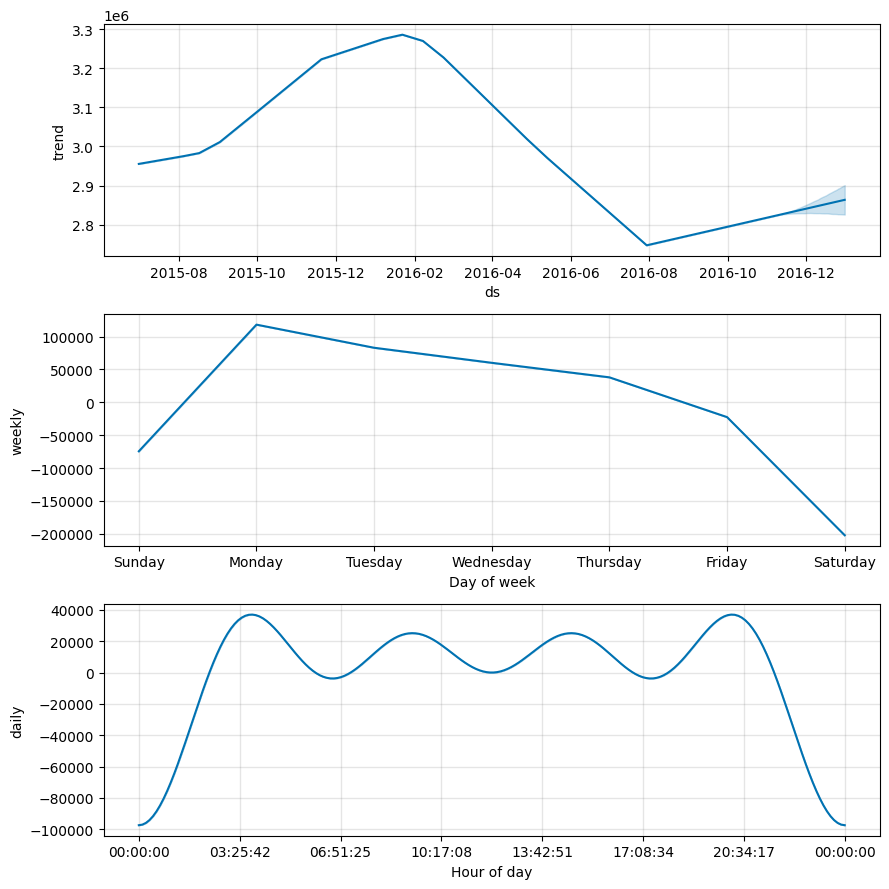

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare data for Prophet
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)
views = views.fillna(0)

# Prophet expects two columns: ds (date) and y (value)
df_prophet = pd.DataFrame({
    "ds": views.index,
    "y": views.values
})

# Train-test split
split_idx = int(len(df_prophet) * 0.9)
train = df_prophet.iloc[:split_idx]
test = df_prophet.iloc[split_idx:]

# Fit Prophet model
model = Prophet(daily_seasonality=True)
model.fit(train)

#  Forecast
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

#  Evaluation
predicted = forecast.iloc[-len(test):]["yhat"].values
actual = test["y"].values
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f"Selected Page: {page_name}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

#  Plot forecast
fig1 = model.plot(forecast)
plt.title(f"Prophet Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.tight_layout()
plt.show()

#  plot components
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()

## Lets train for another language i.e Spanish "*es*"

## ARIMA

Selected Page: Wikipedia:Portada_es.wikipedia.org_all-access_all-agents
MAE: 65393.06
RMSE: 79226.47
MAPE: 6.23%


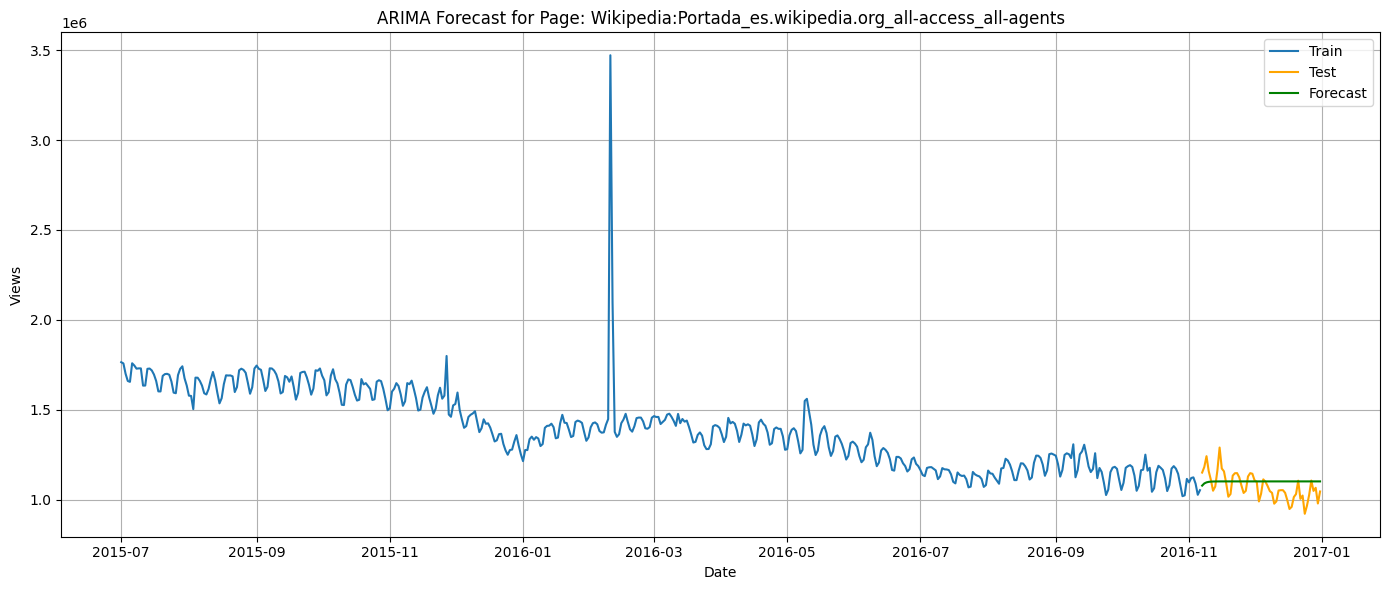

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Filter for a language first (like 'es'), using string match
df_es = df[df["Page"].str.contains("_es.wikipedia.org")].reset_index(drop=True)

# Choose a good page
variances = df_es.drop(columns="Page").var(axis=1)
selected_idx = variances.idxmax()
selected_row = df_es.loc[selected_idx]

# Convert that row into a time series
page_name = selected_row["Page"]
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)

# STEP 5: Clean the data
views = views.fillna(0)


# Train-test split
split_idx = int(len(views) * 0.9)
train = views.iloc[:split_idx]
test = views.iloc[split_idx:]

# Train ARIMA
model = ARIMA(train, order=(1, 1, 1))  # (p, d, q)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluation
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")



#  Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="green")
plt.title(f"ARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Hyperparemeter tunning for ARIMA

Selected Page: Wikipedia:Portada_es.wikipedia.org_all-access_all-agents
Best ARIMA Order: (2, 2, 2)
MAE: 51376.65
RMSE: 64633.09


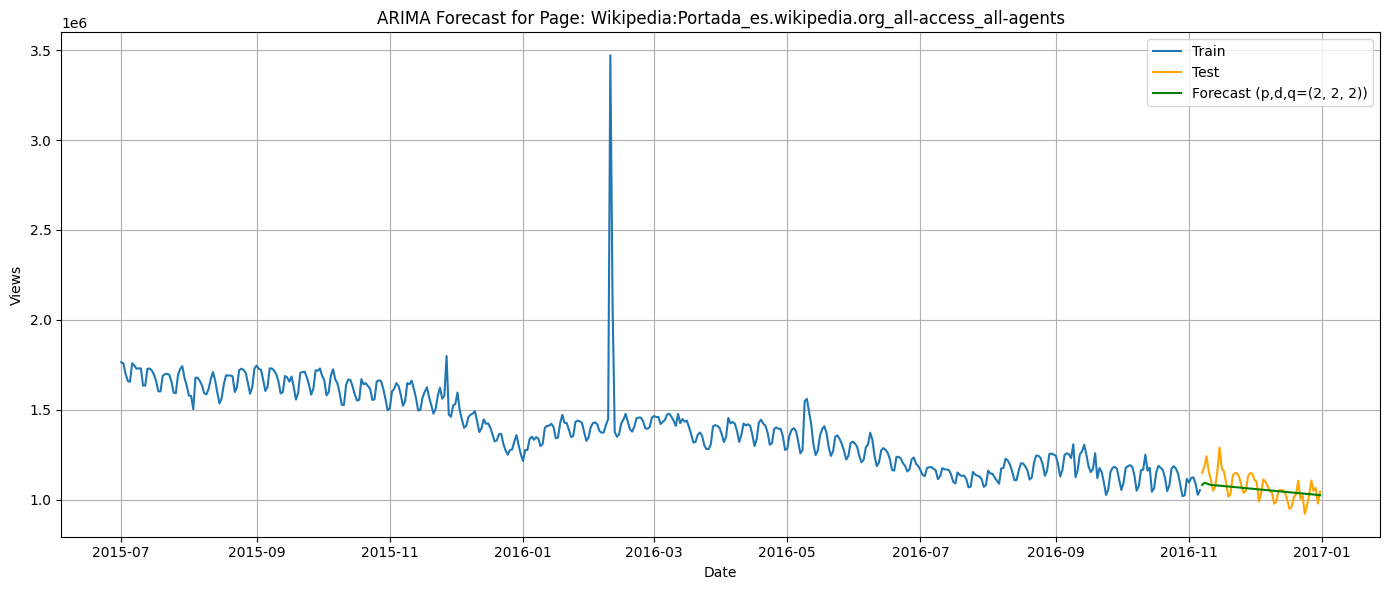

In [ ]:
#  Hyperparameter tuning for ARIMA
best_rmse = float("inf")
best_order = None
best_forecast = None

# Try combinations of p, d, q
for p in [0, 1, 2]:
    for d in [0, 1,2]:
        for q in [0, 1, 2]:
            try:
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                forecast = model_fit.forecast(steps=len(test))
                rmse = np.sqrt(mean_squared_error(test, forecast))

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_order = (p, d, q)
                    best_forecast = forecast
            except:
                continue

#  Evaluation
mae = mean_absolute_error(test, best_forecast)
rmse = best_rmse

print(f"Selected Page: {page_name}")
print(f"Best ARIMA Order: {best_order}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, best_forecast, label=f"Forecast (p,d,q={best_order})", color="green")
plt.title(f"ARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Evaluation

In [ ]:
# Evaluation
mae = mean_absolute_error(test, best_forecast)
rmse = best_rmse
mape = np.mean(np.abs((test - best_forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"Best ARIMA Order: {best_order}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


Selected Page: Wikipedia:Portada_es.wikipedia.org_all-access_all-agents
Best ARIMA Order: (2, 2, 2)
MAE: 51376.65
RMSE: 64633.09
MAPE: 4.70%


## SARIMA

Selected Page: Wikipedia:Portada_es.wikipedia.org_all-access_all-agents
MAE: 34700.90
RMSE: 44567.25
MAPE: 3.15%


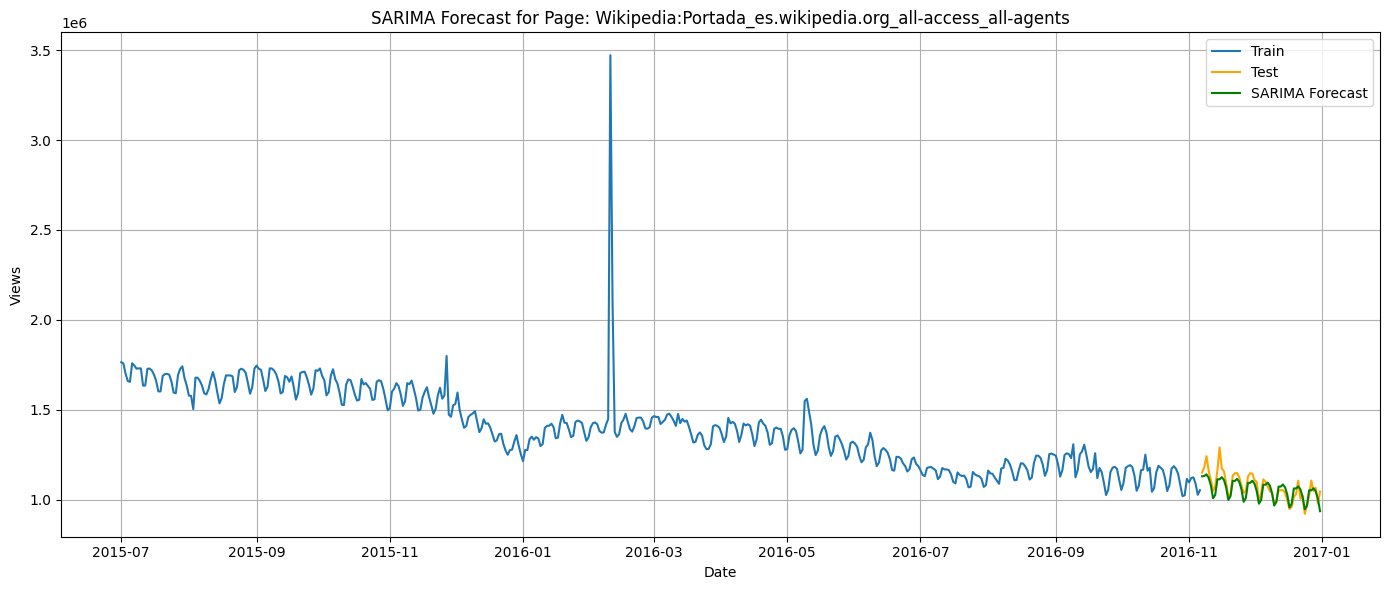

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error


#  Filter for 'es' language pages
df_es = df[df["Page"].str.contains("_es.wikipedia.org")].reset_index(drop=True)

# Select the page with highest variance
variances = df_es.drop(columns="Page").var(axis=1)
selected_idx = variances.idxmax()
selected_row = df_es.loc[selected_idx]
page_name = selected_row["Page"]

#Convert to time series
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)
views = views.fillna(0)

# Train-test split
split_idx = int(len(views) * 0.9)
train = views.iloc[:split_idx]
test = views.iloc[split_idx:]

#  SARIMA model (fixed order and seasonal_order)
model = SARIMAX(train,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7),  # Weekly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False)

#  Forecast
forecast = model_fit.forecast(steps=len(test))

#  Evaluation
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, forecast, label="SARIMA Forecast", color="green")
plt.title(f"SARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Hyperparameter tunning for SARIMA

Selected Page: Wikipedia:Portada_es.wikipedia.org_all-access_all-agents
Best SARIMA Order: (0, 1, 1)
Best Seasonal Order: (1, 1, 1, 7)
MAE: 34146.73
RMSE: 43418.49
MAPE: 3.12%


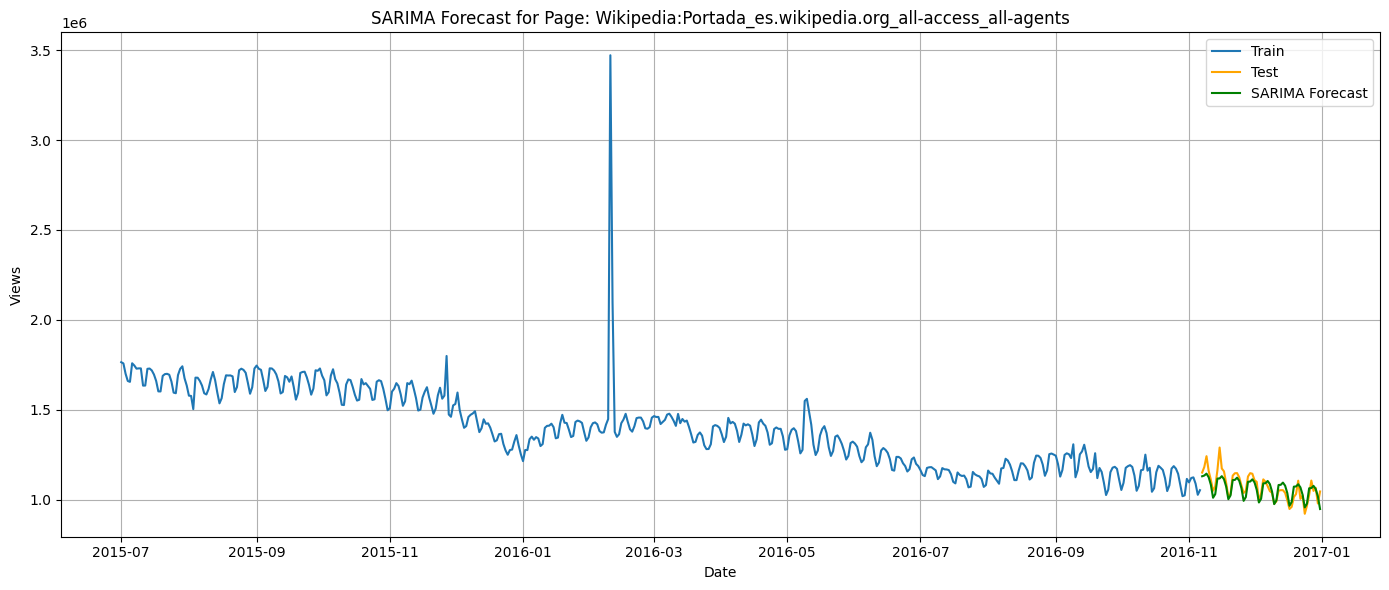

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Filter for 'es' language pages
df_es = df[df["Page"].str.contains("_es.wikipedia.org")].reset_index(drop=True)

# Pick the most variable page
variances = df_es.drop(columns="Page").var(axis=1)
selected_idx = variances.idxmax()
selected_row = df_es.loc[selected_idx]
page_name = selected_row["Page"]

# Convert row to time series
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)
views = views.fillna(0)

# Train-test split
split_idx = int(len(views) * 0.9)
train = views.iloc[:split_idx]
test = views.iloc[split_idx:]

#  SARIMA Hyperparameter tuning
import warnings
warnings.filterwarnings("ignore")

best_order = None
best_seasonal_order = None
best_rmse = float("inf")
best_forecast = None

# Try a few combinations of (p,d,q) and (P,D,Q,s)
for p in range(0, 3):
    for d in range(0, 2):
        for q in range(0, 3):
            for P in range(0, 2):
                for D in range(0, 2):
                    for Q in range(0, 2):
                        try:
                            model = SARIMAX(train,
                                            order=(p, d, q),
                                            seasonal_order=(P, D, Q, 7),  # 7-day weekly seasonality
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
                            model_fit = model.fit(disp=False)
                            forecast = model_fit.forecast(steps=len(test))
                            rmse = np.sqrt(mean_squared_error(test, forecast))

                            if rmse < best_rmse:
                                best_rmse = rmse
                                best_order = (p, d, q)
                                best_seasonal_order = (P, D, Q, 7)
                                best_forecast = forecast
                        except:
                            continue

#  Evaluate
mae = mean_absolute_error(test, best_forecast)
mape = np.mean(np.abs((test - best_forecast) / test)) * 100

print(f"Selected Page: {page_name}")
print(f"Best SARIMA Order: {best_order}")
print(f"Best Seasonal Order: {best_seasonal_order}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {best_rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, best_forecast, label="SARIMA Forecast", color="green")
plt.title(f"SARIMA Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Facebook Prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wsd_h9g/tbqc5fmo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6wsd_h9g/esxv7n3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38112', 'data', 'file=/tmp/tmp6wsd_h9g/tbqc5fmo.json', 'init=/tmp/tmp6wsd_h9g/esxv7n3s.json', 'output', 'file=/tmp/tmp6wsd_h9g/prophet_modele44wz5xo/prophet_model-20250420092558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:25:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:25:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Selected Page: Wikipedia:Portada_es.wikipedia.org_all-access_all-agents
MAE: 43788.09
RMSE: 56734.13
MAPE: 4.18%


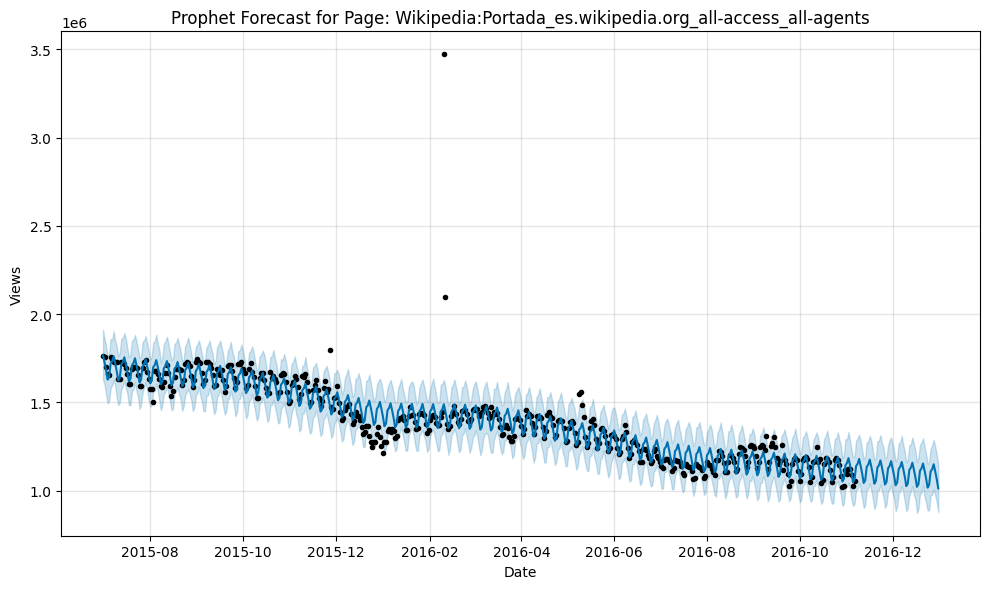

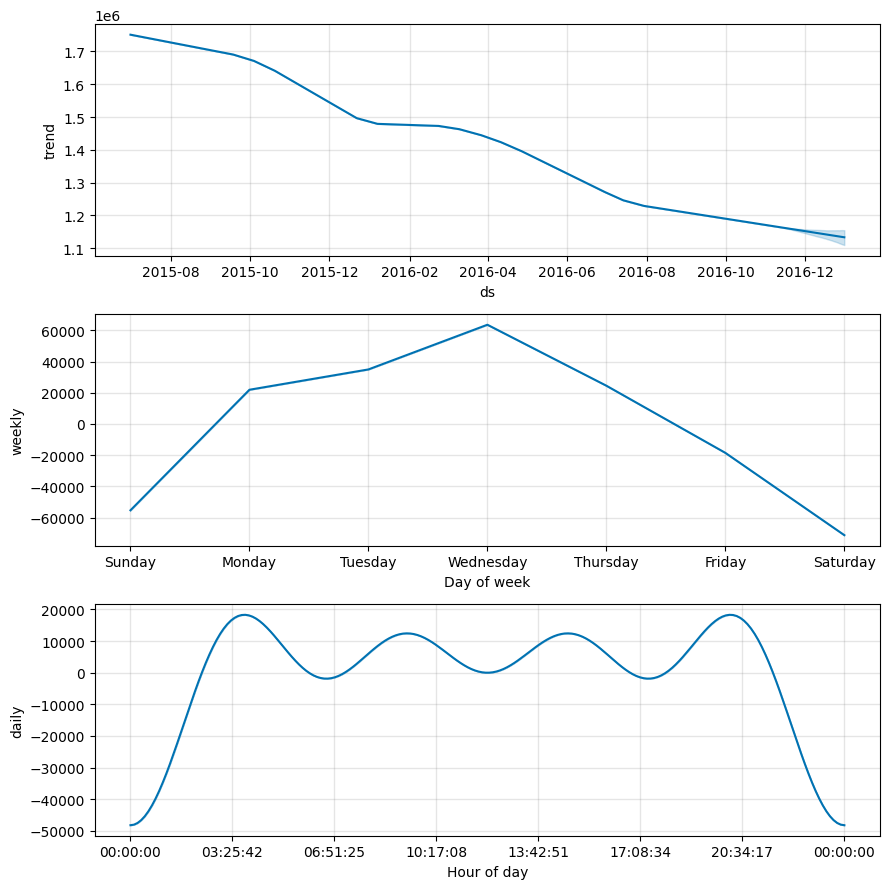

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

#  Prepare data for Prophet
views = selected_row.drop("Page").astype(float)
views.index = pd.to_datetime(views.index, dayfirst=True)
views = views.fillna(0)

# Prophet expects two columns: ds (date) and y (value)
df_prophet = pd.DataFrame({
    "ds": views.index,
    "y": views.values
})

#  Train-test split
split_idx = int(len(df_prophet) * 0.9)
train = df_prophet.iloc[:split_idx]
test = df_prophet.iloc[split_idx:]

#  Fit Prophet model
model = Prophet(daily_seasonality=True)
model.fit(train)

#  Forecast
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

#  Evaluation
predicted = forecast.iloc[-len(test):]["yhat"].values
actual = test["y"].values
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f"Selected Page: {page_name}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

#  Plot forecast
fig1 = model.plot(forecast)
plt.title(f"Prophet Forecast for Page: {page_name}")
plt.xlabel("Date")
plt.ylabel("Views")
plt.tight_layout()
plt.show()

# plot components
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()

# Comparison
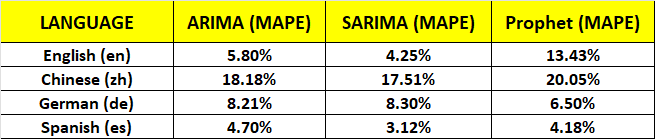

## Create a Pipeline for diffrent languages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller

# PREPROCESSING FIXED ---
df_long = df.melt(id_vars=["Page", "Title", "Language"],
                  var_name="Date", value_name="Views")

# Convert date column
df_long["Date"] = pd.to_datetime(df_long["Date"], dayfirst=True, errors="coerce")
df_long.dropna(subset=["Date"], inplace=True)

# PIPELINE FOR MULTIPLE SERIES ---
def process_series(group_df):
    df_group = group_df.copy()
    df_group = df_group.groupby("Date")["Views"].sum().reset_index()
    df_group = df_group.sort_values("Date")
    df_group.set_index("Date", inplace=True)

    # Train-test split
    actual = df_group["Views"].iloc[-30:]

    # --- ARIMA TUNING ---
    best_rmse = float("inf")
    best_order = None
    best_forecast = None

    for p in [0, 1, 2]:
        for d in [0, 1, 2]:
            for q in [0, 1, 2]:
                try:
                    model = ARIMA(df_group["Views"], order=(p, d, q))
                    model_fit = model.fit()
                    forecast = model_fit.forecast(steps=30)
                    rmse = np.sqrt(mean_squared_error(actual, forecast[:len(actual)]))
                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_order = (p, d, q)
                        best_forecast = forecast
                except:
                    continue

    print(f"ARIMA - Best Order: {best_order}, RMSE: {best_rmse:.2f}")

    # --- SARIMA TUNING ---
    best_rmse_sarima = float("inf")
    best_order_sarima = None
    best_seasonal_order = None
    best_forecast_sarima = None

    for p in [0, 1]:
        for d in [0, 1]:
            for q in [0, 1]:
                for P in [0, 1]:
                    for D in [0, 1]:
                        for Q in [0, 1]:
                            seasonal_order = (P, D, Q, 7)
                            try:
                                model = SARIMAX(df_group["Views"], order=(p, d, q), seasonal_order=seasonal_order,
                                                enforce_stationarity=False, enforce_invertibility=False)
                                model_fit = model.fit(disp=False)
                                forecast = model_fit.forecast(steps=30)
                                rmse = np.sqrt(mean_squared_error(actual, forecast[:len(actual)]))
                                if rmse < best_rmse_sarima:
                                    best_rmse_sarima = rmse
                                    best_order_sarima = (p, d, q)
                                    best_seasonal_order = seasonal_order
                                    best_forecast_sarima = forecast
                            except:
                                continue

    print(f"SARIMA - Best Order: {best_order_sarima}, Seasonal: {best_seasonal_order}, RMSE: {best_rmse_sarima:.2f}")

    # --- PLOTTING ---
    plt.figure(figsize=(14, 6))
    plt.plot(df_group.index, df_group["Views"], label="Actual")
    if best_forecast is not None:
        plt.plot(pd.date_range(df_group.index[-1], periods=30, freq="D"), best_forecast, label="ARIMA Forecast", color="purple")
    if best_forecast_sarima is not None:
        plt.plot(pd.date_range(df_group.index[-1], periods=30, freq="D"), best_forecast_sarima, label="SARIMA Forecast", color="green")
    plt.title("ARIMA and SARIMA Forecast")
    plt.xlabel("Date")
    plt.ylabel("Views")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Apply the pipeline to each language
for lang, group in df_long.groupby("Language"):
    print(f"\n--- Forecasting for Language: {lang} ---")
    process_series(group)


# Quiestionaire
###1.	Defining the problem statements and where can this and modifications of this be used?
- Problem Statement:
You're predicting daily Wikipedia page views over 550 days for various languages (English, Chinese, German, Spanish), enabling ad optimization for clients in different regions. The goal is to forecast traffic accurately so that ad placements for maximum visibility and engagement.

Applications
 - Clients can place ads on high-traffic days/pages.
 - Identify peak times for content publication by language/region.
 - Extendable to country-level, topic-level, or device-specific predictions



###2.	Write 3 inferences you made from the data visualizations
- Spanish pages had the lowest MAPE across models, meaning better predictability of user behavior.
- Chinese pages had the highest MAPE, indicating irregular patterns.
- Prophet performed poorly for English and Chinese, whereas SARIMA was most consistent across all languages.

### 3.	What does the decomposition of series do?
- Decomposition splits a time series into:
 - Trend: Long-term movement (e.g.upward).
 - Seasonality: Recurring patterns (e.g., weekday/weekend traffic).
 - Residual: Irregular, random noise.

### 4.	What level of differencing gave you a stationary series?
- 1st-order differencing (d=1) was sufficient to achieve stationarity.


### 5.	Difference between arima, sarima & sarimax.
- ARIMA (AutoRegressive Integrated Moving Average)
 - Purpose: Models non-seasonal time series data that shows trends or patterns over time.
 - AR (AutoRegressive): Uses the relationship between an observation and several lagged observations.
 - I (Integrated): Involves differencing the raw observations to make the time series stationary.
 - MA (Moving Average): Models the relationship between an observation and a residual error from a moving average model.

-  SARIMA (Seasonal AutoRegressive Integrated Moving Average)
 - Purpose: Extends ARIMA to handle seasonality in time series data
 - SAR (Seasonal AutoRegressive): Models the relationship between an observation and several observations from the same season.
 - SI (Seasonal Integrated): Involves differencing the raw observations at the seasonal lag to make the time series stationary.
 - SMA (Seasonal Moving Average): Models the relationship between an observation and a residual error from a moving average model applied to lagged observations from the same season.

- SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous variables)
 - Purpose: Further extends SARIMA by incorporating exogenous variables that may influence the time series.
 - Exogenous Variables (X): External factors that are not part of the time series but can affect its behavior, such as advertising spend, holidays.


6.	Compare the number of views in different languages

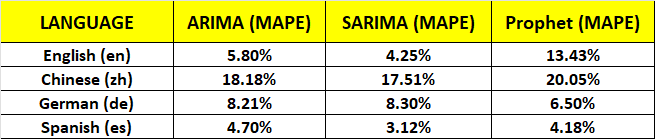


### 7.	What other methods other than grid search would be suitable to get the model for all languages?
- Randomized Search: Faster, less exhaustive.
- Cross-Validation Based Tuning